In [1]:
import pickle
import pandas as pd

In [3]:
2**24*2**3/2**30

0.125

In [2]:
from plot_utils import *

In [80]:
from importlib import reload

import plot_utils
reload(plot_utils)
from plot_utils import *

# Generate parameters

## Print paramsters

### Bricklayer

In [4]:
import numpy as np
import os
from functools import reduce

In [5]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params.txt',exist=False,filelist=None)


L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':0,'de':1},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 248000/248000 [00:01<00:00, 205635.94it/s]


['0 1 24 0.50 470',
 '0 1 24 0.50 766',
 '0 1 24 0.50 770',
 '0 1 24 0.60 1141',
 '0 1 24 0.60 1253',
 '0 1 24 0.60 1999']

In [ ]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.22,.32,11),np.linspace(.48,.52,5)))
# generate_params(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_3.txt',exist=False,filelist=None)
L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':1,'de':3},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

In [7]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.20,.30,11),np.linspace(.48,.52,5)))
# generate_params(nu=2,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_2_3.txt',exist=False,filelist=None)

L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':2,'de':3},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 256000/256000 [00:01<00:00, 200953.77it/s]


['2 3 24 0.57 1483',
 '2 3 24 0.57 1832',
 '2 3 24 0.57 1835',
 '2 3 24 0.57 1837',
 '2 3 24 0.57 1838',
 '2 3 24 0.57 1840',
 '2 3 24 0.57 1843',
 '2 3 24 0.57 1844',
 '2 3 24 0.57 1846',
 '2 3 24 0.57 1847',
 '2 3 24 0.57 1850',
 '2 3 24 0.57 1852',
 '2 3 24 0.57 1853',
 '2 3 24 0.57 1855',
 '2 3 24 0.57 1856',
 '2 3 24 0.57 1861',
 '2 3 24 0.57 1864',
 '2 3 24 0.57 1865',
 '2 3 24 0.57 1866',
 '2 3 24 0.57 1870',
 '2 3 24 0.57 1871',
 '2 3 24 0.57 1872',
 '2 3 24 0.57 1875',
 '2 3 24 0.57 1882',
 '2 3 24 0.57 1883',
 '2 3 24 0.57 1884',
 '2 3 24 0.57 1885',
 '2 3 24 0.57 1889',
 '2 3 24 0.57 1891',
 '2 3 24 0.57 1893',
 '2 3 24 0.57 1897',
 '2 3 24 0.57 1898',
 '2 3 24 0.57 1899',
 '2 3 24 0.57 1900',
 '2 3 24 0.57 1901',
 '2 3 24 0.57 1902',
 '2 3 24 0.57 1903',
 '2 3 24 0.57 1904',
 '2 3 24 0.57 1908',
 '2 3 24 0.57 1909',
 '2 3 24 0.57 1912',
 '2 3 24 0.57 1919',
 '2 3 24 0.57 1921',
 '2 3 24 0.57 1923',
 '2 3 24 0.57 1924',
 '2 3 24 0.57 1929',
 '2 3 24 0.57 1933',
 '2 3 24 0.57

In [ ]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params(nu=1,de=2,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_2.txt',exist=False,filelist=None)

L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':1,'de':2},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

In [9]:
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.2,.3,11),np.linspace(.33,.43,11),))
# generate_params(nu=1,de=6,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_6.txt',exist=False,filelist=None)

L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':1,'de':6},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 296000/296000 [00:01<00:00, 212032.08it/s]


[]

### Control transition, w/, w/o feedback

In [131]:
np.linspace(0.455,0.5,10)

array([0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 , 0.495,
       0.5  ])

In [ ]:
'CT_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_L{L}_xj(1-3,2-3)_s{seed}.pickle'

'{p_ctrl:.3f} {p_proj:.3f} {L} {xj} {seed} -noFB'
p_ctrl_fmt+' '+ p_proj_fmt +' {L} {xj} {seed} {noFB}'

In [74]:
p_list = reduce(np.union1d,(np.linspace(0,.6,21),np.linspace(.45,.52,8),np.linspace(0.455,0.5,10)))
# generate_params_CT('1/3,2/3',p_ctrl_list=p_list,p_proj_list=np.linspace(0,0,1),L_list=[16,20,24],seed_list=range(2000),noFB=True,filename='params_single_2.txt',exist=False,filelist=None,dir='CT_1-3,2-3')

L_list= [16,20,24]

generate_params(
    fixed_params={'xj':'1/3,2/3','noFB':True},
    vary_params={'L':L_list,'p_ctrl':p_list,'p_proj':[0],'seed':range(2000),},
    fn_template='CT_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_L{L}_xj(1-3,2-3)_s{seed}_noFB.pickle',
    fn_dir_template='CT_1-3,2-3',
    input_params_template='{p_ctrl:.3f} {p_proj:.3f} {L} {xj} {seed} -noFB',
    load_data=load_pickle,
    filename=None, # 'params_single_2.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 192000/192000 [00:02<00:00, 87113.00it/s]


[]

In [111]:
p_list

array([0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52])

### Bricklayer 2

In [114]:
p_list=np.linspace(0,1,21)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params_2(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_0_1.txt',exist=False,filelist=None,feedback=True,)


L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'FB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 168000/168000 [00:01<00:00, 85779.96it/s]


['0 1 12 0.00 550 -feedback',
 '0 1 12 0.00 555 -feedback',
 '0 1 12 0.70 1523 -feedback',
 '0 1 12 0.85 207 -feedback',
 '0 1 12 0.85 463 -feedback',
 '0 1 12 0.85 954 -feedback',
 '0 1 12 0.85 1227 -feedback',
 '0 1 12 0.85 1419 -feedback',
 '0 1 12 0.85 1528 -feedback',
 '0 1 12 0.85 1653 -feedback',
 '0 1 12 0.85 1858 -feedback',
 '0 1 12 0.85 1896 -feedback',
 '0 1 12 0.85 1941 -feedback',
 '0 1 12 0.90 390 -feedback',
 '0 1 12 0.90 1737 -feedback',
 '0 1 12 0.95 387 -feedback',
 '0 1 12 0.95 1022 -feedback',
 '0 1 12 0.95 1266 -feedback',
 '0 1 12 1.00 322 -feedback',
 '0 1 12 1.00 1576 -feedback',
 '0 1 16 0.00 226 -feedback',
 '0 1 16 0.00 227 -feedback',
 '0 1 16 0.00 843 -feedback',
 '0 1 16 0.00 880 -feedback',
 '0 1 16 0.00 896 -feedback',
 '0 1 16 0.00 1034 -feedback',
 '0 1 16 0.00 1681 -feedback',
 '0 1 16 0.05 1845 -feedback',
 '0 1 16 0.05 1848 -feedback',
 '0 1 16 0.10 443 -feedback',
 '0 1 16 0.10 1574 -feedback',
 '0 1 16 0.10 1587 -feedback',
 '0 1 16 0.10 1951 -fe

In [115]:
p_list=np.linspace(0,1,21)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params_2(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_0_1_noFB.txt',exist=False,filelist=None,feedback=False)

generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'noFB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 168000/168000 [00:01<00:00, 85159.66it/s]


['0 1 12 0.15 1934',
 '0 1 12 0.15 1938',
 '0 1 12 0.15 1943',
 '0 1 12 0.15 1945',
 '0 1 12 0.15 1963',
 '0 1 12 0.20 2',
 '0 1 12 0.20 10',
 '0 1 12 0.20 15',
 '0 1 12 0.20 30',
 '0 1 12 0.20 56',
 '0 1 12 0.20 58',
 '0 1 12 0.20 59',
 '0 1 12 0.20 60',
 '0 1 12 0.20 61',
 '0 1 12 0.20 62',
 '0 1 12 0.20 63',
 '0 1 12 0.20 64',
 '0 1 12 0.20 65',
 '0 1 12 0.20 66',
 '0 1 12 0.20 67',
 '0 1 12 0.20 68',
 '0 1 12 0.20 69',
 '0 1 12 0.20 70',
 '0 1 12 0.20 71',
 '0 1 12 0.20 72',
 '0 1 12 0.20 73',
 '0 1 12 0.20 74',
 '0 1 12 0.20 75',
 '0 1 12 0.20 77',
 '0 1 12 0.20 78',
 '0 1 12 0.20 79',
 '0 1 12 0.20 122',
 '0 1 12 0.20 124',
 '0 1 12 0.20 126',
 '0 1 12 0.20 127',
 '0 1 12 0.20 128',
 '0 1 12 0.20 129',
 '0 1 12 0.20 130',
 '0 1 12 0.20 131',
 '0 1 12 0.20 132',
 '0 1 12 0.20 135',
 '0 1 12 0.20 136',
 '0 1 12 0.20 137',
 '0 1 12 0.20 138',
 '0 1 12 0.20 140',
 '0 1 12 0.20 141',
 '0 1 12 0.20 142',
 '0 1 12 0.20 145',
 '0 1 12 0.20 146',
 '0 1 12 0.20 147',
 '0 1 12 0.20 148',
 '

In [124]:
p_list=np.linspace(0,1,21)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params_2(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_3.txt',exist=False,filelist=None,feedback=True)


L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':1,'de':3,'feedback':'FB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 168000/168000 [00:01<00:00, 85422.71it/s]


['1 3 20 0.50 1498 -feedback',
 '1 3 20 0.50 1630 -feedback',
 '1 3 20 0.50 1771 -feedback',
 '1 3 20 0.50 1860 -feedback',
 '1 3 20 0.50 1870 -feedback',
 '1 3 20 0.55 186 -feedback',
 '1 3 20 0.55 389 -feedback',
 '1 3 20 0.55 509 -feedback',
 '1 3 20 0.55 589 -feedback',
 '1 3 20 0.55 704 -feedback',
 '1 3 20 0.55 1079 -feedback',
 '1 3 20 0.55 1162 -feedback',
 '1 3 20 0.55 1263 -feedback',
 '1 3 20 0.55 1538 -feedback',
 '1 3 20 0.55 1618 -feedback',
 '1 3 20 0.55 1653 -feedback',
 '1 3 20 0.55 1749 -feedback',
 '1 3 20 0.55 1938 -feedback',
 '1 3 20 0.60 72 -feedback',
 '1 3 20 0.60 210 -feedback']

In [122]:
p_list=np.linspace(0,1,21)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params_2(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_3_noFB.txt',exist=False,filelist=None,feedback=False)

L_list= [12,16,20,24]
generate_params(
    fixed_params={'nu':1,'de':3,'feedback':'noFB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 168000/168000 [00:01<00:00, 84046.55it/s]


[]

In [ ]:
### There is a problem here, which is that whether AFM is hard coded, and cannot be changed easily with options. Need to change this

In [134]:
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.61,.8,20),))
# generate_params_2(nu=0,de=1,L_list=[12,16,20,24][::-1],seed_list=range(2000),p_list=p_list,filename='params_0_1.txt',exist=False,filelist=None,feedback=True,AFM=True)


L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'FB','AFM':"AFM"},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{AFM}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 296000/296000 [00:03<00:00, 87188.68it/s]


['0 1 12 0.73 987 -feedback',
 '0 1 12 0.73 1000 -feedback',
 '0 1 12 0.73 1070 -feedback',
 '0 1 12 0.73 1088 -feedback',
 '0 1 12 0.73 1091 -feedback',
 '0 1 12 0.73 1094 -feedback',
 '0 1 12 0.73 1097 -feedback',
 '0 1 12 0.73 1103 -feedback',
 '0 1 12 0.73 1104 -feedback',
 '0 1 12 0.73 1107 -feedback',
 '0 1 12 0.73 1110 -feedback',
 '0 1 12 0.73 1111 -feedback',
 '0 1 12 0.73 1117 -feedback',
 '0 1 12 0.73 1118 -feedback',
 '0 1 12 0.73 1120 -feedback',
 '0 1 12 0.73 1121 -feedback',
 '0 1 12 0.73 1126 -feedback',
 '0 1 12 0.73 1127 -feedback',
 '0 1 12 0.73 1135 -feedback',
 '0 1 12 0.73 1139 -feedback',
 '0 1 12 0.73 1144 -feedback',
 '0 1 12 0.73 1179 -feedback',
 '0 1 12 0.73 1187 -feedback',
 '0 1 12 0.73 1286 -feedback',
 '0 1 12 0.73 1298 -feedback',
 '0 1 12 0.73 1307 -feedback',
 '0 1 12 0.73 1310 -feedback',
 '0 1 12 0.73 1311 -feedback',
 '0 1 12 0.78 1368 -feedback',
 '0 1 16 0.63 1091 -feedback',
 '0 1 16 0.63 1307 -feedback',
 '0 1 16 0.63 1412 -feedback',
 '0 1 16 

In [142]:
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.50,.65,16),))
# generate_params_2(nu=0,de=1,L_list=[12,16,20,24][::-1],seed_list=range(2000),p_list=p_list,filename='params_0_1_noFB.txt',exist=False,filelist=None,feedback=False,AFM=True)

L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'noFB','AFM':"AFM"},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{AFM}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 272000/272000 [00:03<00:00, 84880.01it/s]


['0 1 12 0.53 155',
 '0 1 12 0.54 611',
 '0 1 12 0.54 1805',
 '0 1 12 0.58 1328',
 '0 1 12 0.58 1729',
 '0 1 12 0.58 1731',
 '0 1 12 0.58 1732',
 '0 1 12 0.58 1740',
 '0 1 12 0.58 1744',
 '0 1 12 0.58 1746',
 '0 1 12 0.58 1752',
 '0 1 12 0.58 1756',
 '0 1 12 0.58 1760',
 '0 1 12 0.59 277',
 '0 1 12 0.59 280',
 '0 1 12 0.59 282',
 '0 1 12 0.59 283',
 '0 1 12 0.59 285',
 '0 1 12 0.59 286',
 '0 1 12 0.59 287',
 '0 1 12 0.59 288',
 '0 1 12 0.59 289',
 '0 1 12 0.59 290',
 '0 1 12 0.64 1572',
 '0 1 12 0.64 1588',
 '0 1 12 0.64 1750',
 '0 1 12 0.64 1757',
 '0 1 12 0.64 1758',
 '0 1 12 0.64 1759',
 '0 1 12 0.64 1760',
 '0 1 12 0.64 1761',
 '0 1 12 0.64 1772',
 '0 1 12 0.64 1776',
 '0 1 12 0.64 1785',
 '0 1 12 0.64 1786',
 '0 1 12 0.64 1795',
 '0 1 12 0.64 1798',
 '0 1 12 0.64 1800',
 '0 1 12 0.64 1805',
 '0 1 12 0.64 1806',
 '0 1 20 0.64 1238',
 '0 1 24 0.51 23',
 '0 1 24 0.51 547',
 '0 1 24 0.51 778',
 '0 1 24 0.51 819',
 '0 1 24 0.51 859',
 '0 1 24 0.51 897',
 '0 1 24 0.51 961',
 '0 1 24 0.5

In [69]:
p_list

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95,
       1.  ])

### Bricklayer 3

In [143]:
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.16,.25,10)))
# generate_params_3(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_AFM.txt',exist=False,filelist=None,feedback=True)

L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'FB','AFM':"AFM"},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer3_{AFM}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 232000/232000 [00:02<00:00, 79733.35it/s]


[]

In [144]:
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.16,.25,10)))
# generate_params_3(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_AFM_noFB.txt',exist=False,filelist=None,feedback=False)
L_list= [12,16,20,24]

generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'noFB','AFM':"AFM"},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer3_{AFM}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 232000/232000 [00:02<00:00, 79415.58it/s]


[]

In [152]:
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.10,.25,16)))
# generate_params_3(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_3_FB.txt',exist=False,filelist=None,feedback=True,AFM=False)

L_list= [12,16,20,24]
generate_params(
    fixed_params={'nu':1,'de':3,'feedback':'FB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer3_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 264000/264000 [00:03<00:00, 81303.06it/s]


[]

In [153]:
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.10,.25,16)))
# generate_params_3(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename='params_1_3_noFB.txt',exist=False,filelist=None,feedback=False,AFM=False)

L_list= [12,16,20,24]
generate_params(
    fixed_params={'nu':1,'de':3,'feedback':'noFB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer3_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=False,
    data_dict=None,
)

generate_params: 100%|██████████| 264000/264000 [00:03<00:00, 80750.64it/s]


[]

In [43]:
p_list

array([0.  , 0.05, 0.1 , 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65,
       0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

## Load data

### Bricklayer

In [38]:
# data_0_1_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_0_1_dict)

L_list=[12,16,20,24]

data_0_1_dict=generate_params(
    fixed_params={'nu':0,'de':1},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer_adder_({nu}-{de}).pickle'
)


df_0_1=convert_pd(data_0_1_dict,names=['Metrics','p','L'])


generate_params:   0%|          | 0/248000 [00:00<?, ?it/s]

generate_params: 100%|██████████| 248000/248000 [00:00<00:00, 507456.26it/s]


In [39]:
df_0_1

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.6805789328839875, -2.673656143370288, -2.6..."
EE,0.00,12,"[3.657602635811222, 3.652433655550861, 3.65117..."
TMI,0.03,12,"[-2.5527722391309147, -2.0623608536252274, -1...."
EE,0.03,12,"[3.6027033987340342, 3.3375183700452933, 2.656..."
TMI,0.06,12,"[-1.3742478381520042, -0.9499572161889696, -0...."
...,...,...,...
EE,0.54,24,"[0.02056109699008511, 0.5069641751102318, 0.44..."
TMI,0.57,24,"[-5.54140128479947e-15, -7.8439722495105e-09, ..."
EE,0.57,24,"[2.551951005937217e-15, 0.32125512398759, 0.23..."


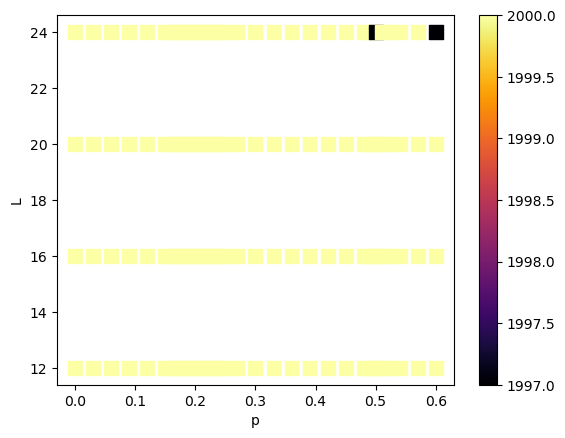

In [40]:
visualize_dataset(df_0_1,xlabel='p',ylabel='L',)

In [15]:
data_1_3_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.22,.32,11),np.linspace(.48,.52,5)))

# generate_params(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_1_3_dict)
# df_1_3=convert_pd(data_1_3_dict)

L_list=[12,16,20,24]


data_1_3_dict=generate_params(
    fixed_params={'nu':1,'de':3},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer_adder_({nu}-{de}).pickle'
)


df_1_3=convert_pd(data_1_3_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 256000/256000 [00:06<00:00, 36646.25it/s]


In [16]:
df_1_3

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.6790125131091127, -2.7015819215303694, -2...."
EE,0.00,12,"[3.65132252869602, 3.673265945444025, 3.654857..."
TMI,0.03,12,"[-2.6576663788688855, -2.4693847612259425, -1...."
EE,0.03,12,"[3.6526456955384043, 3.5453014582593525, 2.819..."
TMI,0.06,12,"[-1.7036705460184616, -1.2487625984507358, -0...."
...,...,...,...
EE,0.54,24,"[0.14664095844577374, 0.8204104472141127, 1.26..."
TMI,0.57,24,"[-9.86303017036505e-08, -0.0004094666549760428..."
EE,0.57,24,"[0.5038709574301601, 0.6977295047350204, 0.911..."


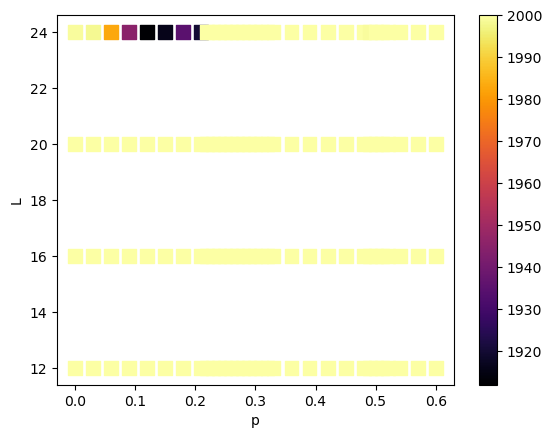

In [17]:
visualize_dataset(df_1_3,xlabel='p',ylabel='L',)

In [22]:
# data_2_3_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.25,.35,11),np.linspace(.48,.52,5)))

# generate_params(nu=2,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_2_3_dict)
# df_2_3=convert_pd(data_2_3_dict)


L_list=[12,16,20,24]


data_2_3_dict=generate_params(
    fixed_params={'nu':2,'de':3},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer_adder_({nu}-{de}).pickle'
)


df_2_3=convert_pd(data_2_3_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 256000/256000 [00:12<00:00, 20659.43it/s]


In [23]:
df_2_3

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.696683996212151, -2.691282974683912, -2.69..."
EE,0.00,12,"[3.6619437337489176, 3.658236922334338, 3.6709..."
TMI,0.03,12,"[-2.6658873216519248, -2.3569014612804904, -1...."
EE,0.03,12,"[3.6391155552379364, 3.4895165362941327, 2.754..."
TMI,0.06,12,"[-1.6198656272518255, -1.3684252398851435, -0...."
...,...,...,...
EE,0.54,24,"[0.10070096344803388, 0.8143928390237998, 0.54..."
TMI,0.57,24,"[-6.00908212078366e-15, -0.021448626258458336,..."
EE,0.57,24,"[0.11774098696456156, 0.562482153287403, 0.878..."


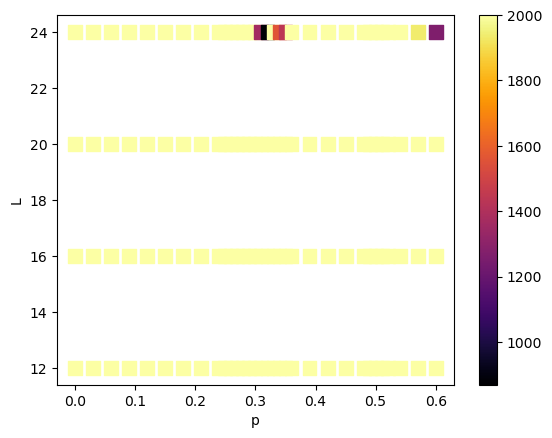

In [24]:
visualize_dataset(df_2_3,xlabel='p',ylabel='L',)

In [25]:
# data_1_2_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))

# generate_params(nu=1,de=2,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_1_2_dict)
# df_1_2=convert_pd(data_1_2_dict)

L_list=[12,16,20,24]


data_1_2_dict=generate_params(
    fixed_params={'nu':1,'de':2},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer_adder_({nu}-{de}).pickle'
)


df_1_2=convert_pd(data_1_2_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 248000/248000 [00:27<00:00, 8865.89it/s] 


In [26]:
df_1_2

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.700581041566328, -2.671324296097452, -2.70..."
EE,0.00,12,"[3.6638733280611526, 3.649966179896585, 3.6608..."
TMI,0.03,12,"[-2.5482857986193377, -2.0749643841899403, -1...."
EE,0.03,12,"[3.60362721090703, 3.373668692601586, 2.686910..."
TMI,0.06,12,"[-1.3885323987573728, -0.988603037556913, -0.1..."
...,...,...,...
EE,0.54,24,"[0.5069641751102318, 0.035349740028073985, 1.2..."
TMI,0.57,24,"[-3.76504444539922e-15, -3.641325019287933e-10..."
EE,0.57,24,"[2.107861796087155e-15, 0.23291076989407983, 0..."


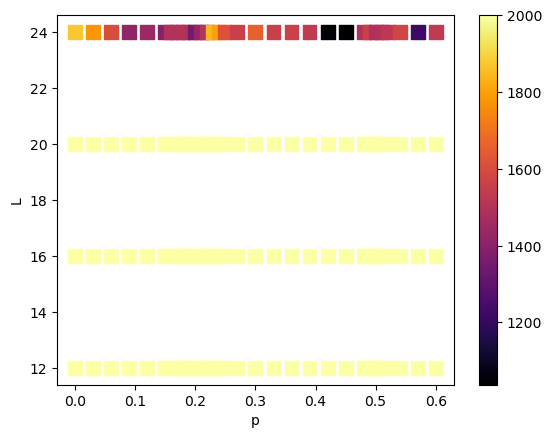

In [27]:
visualize_dataset(df_1_2,xlabel='p',ylabel='L',)

In [28]:
data_1_6_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.2,.3,11),np.linspace(.33,.43,11)))

# generate_params(nu=1,de=6,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,filename=None,exist=True,filelist=None,load=True,data_dict=data_1_6_dict)
# df_1_6=convert_pd(data_1_6_dict)

L_list=[12,16,20,24]


data_1_6_dict=generate_params(
    fixed_params={'nu':1,'de':6},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}.pickle',
    fn_dir_template='bricklayer_{nu}-{de}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer_adder_({nu}-{de}).pickle'
)


df_1_6=convert_pd(data_1_6_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 296000/296000 [00:33<00:00, 8877.85it/s]


In [29]:
df_1_6

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.670585424499761, -2.707825093939915, -2.69..."
EE,0.00,12,"[3.6497611103537833, 3.6665934932606383, 3.650..."
TMI,0.03,12,"[-2.6658221127212838, -2.4387242459553495, -1...."
EE,0.03,12,"[3.645508360537031, 3.5243372913560638, 2.9058..."
TMI,0.06,12,"[-1.7180115040709705, -1.2675434304755666, -0...."
...,...,...,...
EE,0.54,24,"[0.14624613481164064, 0.5435455282233499, 0.63..."
TMI,0.57,24,"[-3.0808688933348094e-15, -0.00442790482391242..."
EE,0.57,24,"[0.11726033626499899, 0.7865067327331333, 0.52..."


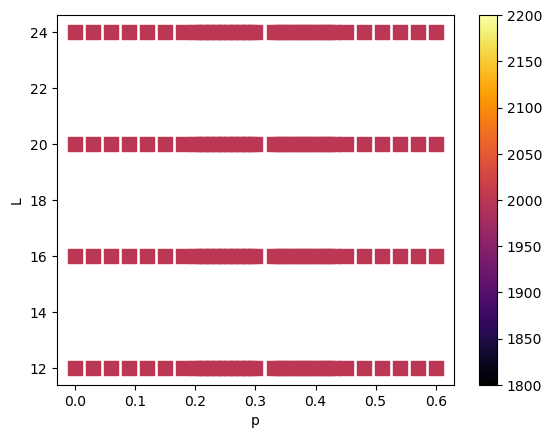

In [30]:
visualize_dataset(df_1_6,xlabel='p',ylabel='L',)

### Control transition, w/, w/o feedback

In [86]:
# data_noFB_dict={'fn':[]}
p_list=np.linspace(0,.6,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.45,.52,8),np.linspace(0.455,0.5,10)))

# generate_params_CT(xj='1/3,2/3',p_ctrl_list=p_list,p_proj_list=np.linspace(0,0,1),L_list=[12,16,20,24],seed_list=range(2000),noFB=True,filename=None,exist=True,filelist=None,load=True,data_dict=data_noFB_dict,bricklayer=False)

L_list= [16,20,24]

data_noFB_dict=generate_params(
    fixed_params={'xj':'1/3,2/3','noFB':True},
    vary_params={'L':L_list,'p_ctrl':p_list,'p_proj':[0],'seed':range(2000),},
    fn_template='CT_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_L{L}_xj(1-3,2-3)_s{seed}_noFB.pickle',
    fn_dir_template='CT_1-3,2-3',
    input_params_template='{p_ctrl:.3f} {p_proj:.3f} {L} {xj} {seed} -noFB',
    load_data=load_pickle,
    filename=None, # 'params_single_2.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='CT_1-3,2-3_noFB.pickle',
)
    
df_noFB=convert_pd(data_noFB_dict,names=['Metrics','p_ctrl','p_proj','L'])

generate_params:   0%|          | 0/192000 [00:00<?, ?it/s]

generate_params: 100%|██████████| 192000/192000 [00:01<00:00, 169740.94it/s]


In [87]:
df_noFB

observations
Metrics p_ctrl p_proj L                                                    
TMI     0.00   0.0    16  [-4.055044063802907, -4.0555504118274674, -4.0...
EE      0.00   0.0    16  [5.047632749389386, 5.047154225778175, 5.04847...
O       0.00   0.0    16  [-0.0002448707980900397, -0.000174449717681981...
TMI     0.03   0.0    16  [-4.00438515230316, -4.053075639281702, -3.977...
EE      0.03   0.0    16  [5.032610905689804, 5.046569357719017, 4.97622...
...                                                                     ...
        0.57   0.0    24  [1.508520526166744e-11, 1.508653752929699e-11,...
O       0.57   0.0    24  [0.09289485914020795, 0.16666666666666666, 0.3...
TMI     0.60   0.0    24  [-4.433032209997607e-11, -4.4331871507097276e-...
EE      0.60   0.0    24  [1.508698161850684e-11, 1.508564935087729e-11,...
O       0.60   0.0    24  [0.3279613849621452, 0.2162604990520363, -0.10...

[279 rows x 1 columns]

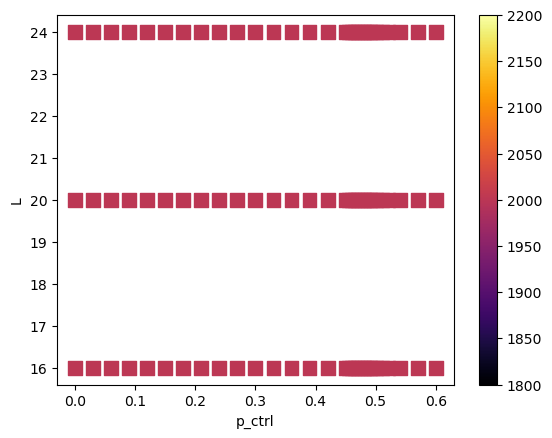

In [90]:
visualize_dataset(df_noFB,xlabel='p_ctrl',ylabel='L',)

### Bricklayer 2

In [111]:
# data_0_1_FB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params_2(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=True,filename=None,exist=True,filelist=None,load=True,data_dict=data_0_1_FB_dict)

L_list= [12,16,20,24]

data_0_1_FB_dict=generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'FB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer2_adder_({nu}-{de})_{feedback}.pickle'
)


df_0_1_FB=convert_pd(data_0_1_FB_dict,names=['Metrics','p','L'])

generate_params:   0%|          | 0/272000 [00:00<?, ?it/s]

generate_params: 100%|██████████| 272000/272000 [00:02<00:00, 126866.40it/s]


In [112]:
df_0_1_FB

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.6805789328839875, -2.673656143370288, -2.6..."
EE,0.00,12,"[3.657602635811222, 3.652433655550861, 3.65117..."
TMI,0.05,12,"[-1.6501675899041284, -0.78175743652608, -0.10..."
EE,0.05,12,"[2.60738564838829, 2.1058078354123175, 2.02791..."
TMI,0.10,12,"[-1.01867114601992, -0.5785675527536116, -0.49..."
...,...,...,...
EE,0.90,24,"[2.107861796087155e-15, 1.885817191162123e-15,..."
TMI,0.95,24,"[-5.5414012847994694e-15, -5.5414012847994694e..."
EE,0.95,24,"[1.885817191162123e-15, 1.885817191162123e-15,..."


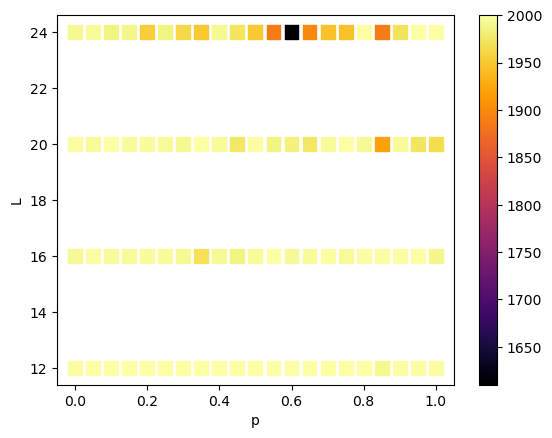

In [113]:
visualize_dataset(df_0_1_FB,xlabel='p',ylabel='L',)

In [ ]:
data_0_1_FB_dict

In [117]:
# data_0_1_noFB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params_2(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=False,filename=None,exist=True,filelist=None,load=True,data_dict=data_0_1_noFB_dict)

L_list= [12,16,20,24]

data_0_1_noFB_dict=generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'noFB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer2_adder_({nu}-{de})_{feedback}.pickle'
)

df_0_1_noFB=convert_pd(data_0_1_noFB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 168000/168000 [00:26<00:00, 6336.45it/s]


In [119]:
df_0_1_noFB

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.6805789328839875, -2.673656143370288, -2.6..."
EE,0.00,12,"[3.657602635811222, 3.652433655550861, 3.65117..."
TMI,0.05,12,"[-1.5742900348782554, -1.0101610160024224, -0...."
EE,0.05,12,"[2.591191716227363, 2.259754628449109, 2.21402..."
TMI,0.10,12,"[-0.9997216262418986, -0.7349962424860528, -0...."
...,...,...,...
EE,0.90,24,"[1.4417279813120607e-15, 2.3299064010121857e-1..."
TMI,0.95,24,"[-5.319356679874439e-15, -5.5414012847994694e-..."
EE,0.95,24,"[2.107861796087155e-15, 1.885817191162123e-15,..."


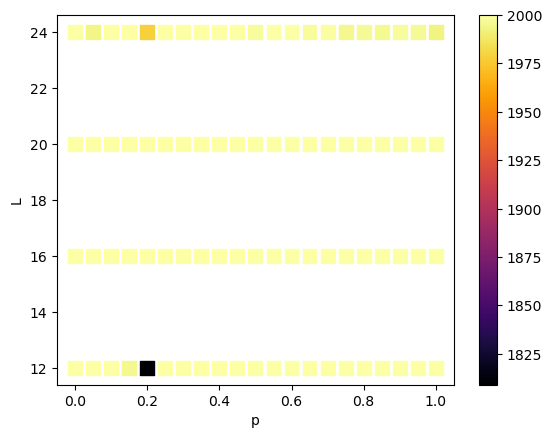

In [120]:
visualize_dataset(df_0_1_noFB,xlabel='p',ylabel='L',)

In [128]:
# data_1_3_FB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params_2(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=True,filename=None,exist=True,filelist=None,load=True,data_dict=data_1_3_FB_dict)


L_list= [12,16,20,24]

data_1_3_FB_dict=generate_params(
    fixed_params={'nu':1,'de':3,'feedback':'FB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer2_adder_({nu}-{de})_{feedback}.pickle'
)
df_1_3_FB=convert_pd(data_1_3_FB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 168000/168000 [00:26<00:00, 6334.15it/s]


In [130]:
df_1_3_FB

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.6805789328839875, -2.673656143370288, -2.6..."
EE,0.00,12,"[3.657602635811222, 3.652433655550861, 3.65117..."
TMI,0.05,12,"[-1.968216617175452, -1.4834150423767702, -1.3..."
EE,0.05,12,"[3.1734196502711174, 2.5493957242594343, 3.045..."
TMI,0.10,12,"[-1.1656317170396946, -1.526698480733344, -1.1..."
...,...,...,...
EE,0.90,24,"[1.4417279813120607e-15, 1.4417279813120607e-1..."
TMI,0.95,24,"[-5.985490494649532e-15, -5.5414012847994694e-..."
EE,0.95,24,"[1.4417279813120607e-15, 1.885817191162123e-15..."


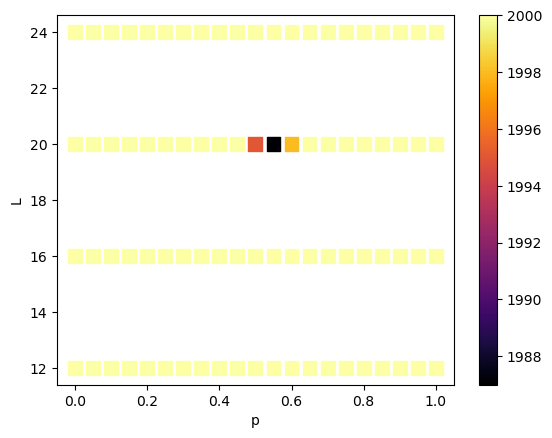

In [131]:
visualize_dataset(df_1_3_FB,xlabel='p',ylabel='L',)

In [129]:
# data_1_3_noFB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
# p_list = reduce(np.union1d,(p_list,np.linspace(.15,.25,11),np.linspace(.48,.52,5)))
# generate_params_2(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=False,filename=None,exist=True,filelist=None,load=True,data_dict=data_1_3_noFB_dict)


L_list= [12,16,20,24]

data_1_3_noFB_dict=generate_params(
    fixed_params={'nu':1,'de':3,'feedback':'noFB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer2_adder_({nu}-{de})_{feedback}.pickle'
)
df_1_3_noFB=convert_pd(data_1_3_noFB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 168000/168000 [00:26<00:00, 6355.94it/s]


In [132]:
df_1_3_noFB

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.6805789328839973, -2.673656143370288, -2.6..."
EE,0.00,12,"[3.65760263581123, 3.652433655550861, 3.651171..."
TMI,0.05,12,"[-1.9526431186854856, -1.471128349451232, -1.2..."
EE,0.05,12,"[3.1526484344915353, 2.5035014385696703, 2.967..."
TMI,0.10,12,"[-1.2814491189447692, -1.5414656113790164, -1...."
...,...,...,...
EE,0.90,24,"[1.885817191162123e-15, 1.885817191162123e-15,..."
TMI,0.95,24,"[-5.5414012847994694e-15, -5.097312074949407e-..."
EE,0.95,24,"[1.885817191162123e-15, 2.3299064010121857e-15..."


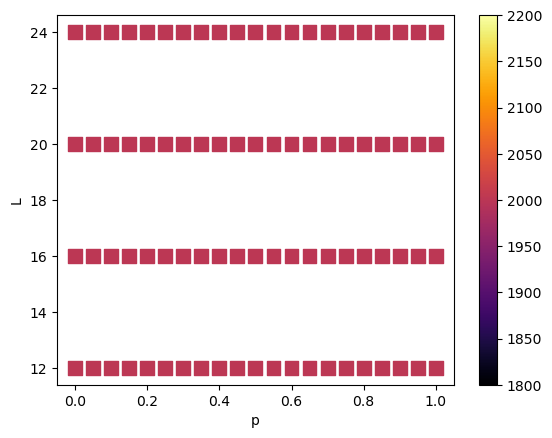

In [133]:
visualize_dataset(df_1_3_noFB,xlabel='p',ylabel='L',)

In [136]:
data2_AFM_FB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.61,.8,20),))

# generate_params_2(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=True,filename=None,exist=True,filelist=None,load=True,data_dict=data2_AFM_FB_dict,AFM=True)

L_list= [12,16,20,24]

data2_AFM_FB_dict=generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'FB','AFM':"AFM"},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{AFM}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer2_adder_AFM_{feedback}.pickle'
)


df2_AFM_FB=convert_pd(data2_AFM_FB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 296000/296000 [00:46<00:00, 6352.84it/s]


In [137]:
df2_AFM_FB

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.6805789328839875, -2.673656143370268, -2.6..."
EE,0.00,12,"[3.657602635811222, 3.6524336555508494, 3.6511..."
TMI,0.05,12,"[-2.100706186235233, -1.7519441054078948, -1.9..."
EE,0.05,12,"[3.3202010463777167, 2.9004218812940157, 3.003..."
TMI,0.10,12,"[-1.673268535672717, -1.8675099818146572, -1.7..."
...,...,...,...
EE,0.90,24,"[2.3299064010121857e-15, 0.6008033173409542, 1..."
TMI,0.95,24,"[0.000676847798652922, 0.0002069743122165659, ..."
EE,0.95,24,"[0.0006768477986603485, 0.00020697431222399307..."


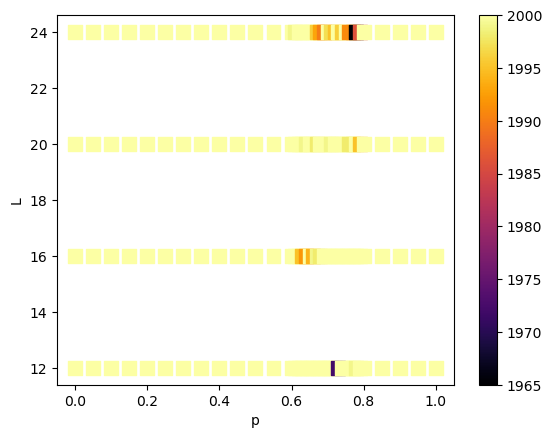

In [138]:
visualize_dataset(df2_AFM_FB,xlabel='p',ylabel='L',)

In [139]:
data2_AFM_noFB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.50,.65,16),))
# generate_params_2(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=False,filename=None,exist=True,filelist=None,load=True,data_dict=data2_AFM_noFB_dict,AFM=True)
# df2_AFM_noFB=convert_pd(data2_AFM_noFB_dict)

L_list= [12,16,20,24]

data2_AFM_noFB_dict=generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'noFB','AFM':"AFM"},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer2_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer2_{AFM}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer2_adder_AFM_{feedback}.pickle'
)


df2_AFM_noFB=convert_pd(data2_AFM_noFB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 272000/272000 [00:41<00:00, 6545.78it/s]


In [140]:
df2_AFM_noFB

,,,observations
Metrics,p,L,
TMI,0.00,12,"[-2.6805789328839875, -2.673656143370288, -2.6..."
EE,0.00,12,"[3.657602635811222, 3.652433655550861, 3.65117..."
TMI,0.05,12,"[-2.0864898851984064, -1.7653518625733575, -1...."
EE,0.05,12,"[3.3198200137417215, 2.8990366917883517, 3.022..."
TMI,0.10,12,"[-1.7429673978057991, -1.9227197919318848, -1...."
...,...,...,...
EE,0.90,24,"[1.4417279813120607e-15, 0.005374954566279483,..."
TMI,0.95,24,"[0.004895134508402635, -5.319356679874439e-15,..."
EE,0.95,24,"[0.004895134508410962, 2.107861796087155e-15, ..."


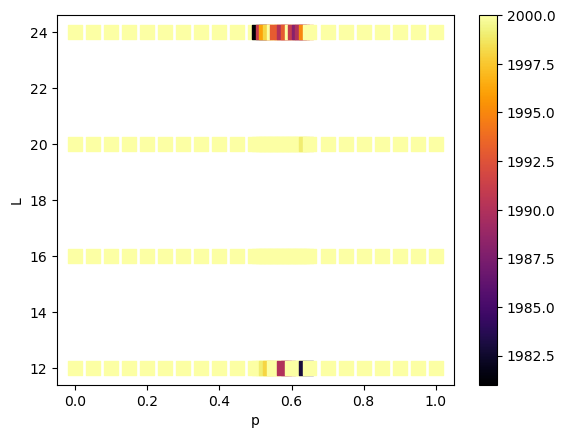

In [141]:
visualize_dataset(df2_AFM_noFB,xlabel='p',ylabel='L',)

### Bricklayer3 AFM

In [145]:
data_AFM_FB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.16,.25,10)))
# generate_params_3(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=True,filename=None,exist=True,filelist=None,load=True,data_dict=data_AFM_FB_dict)

L_list= [12,16,20,24]

data_AFM_FB_dict=generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'FB','AFM':"AFM"},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer3_{AFM}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer3_adder_AFM_{feedback}.pickle'
)

df_AFM_FB=convert_pd(data_AFM_FB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 232000/232000 [00:39<00:00, 5912.81it/s]


In [85]:
df_AFM_FB

observations
Metrics adder  L  p                                                      
TMI     (0, 1) 12 0.00  [-2.690119110954029, -2.6960411873225945, -2.6...
EE      (0, 1) 12 0.00  [3.667372724777514, 3.6643101763908765, 3.6552...
O       (0, 1) 12 0.00  [0.008092935981617732, 0.0009488407046009811, ...
TMI     (0, 1) 12 0.05  [-0.9849973657947246, -2.6726384505024634, -2....
EE      (0, 1) 12 0.05  [2.6572317998926995, 3.6426397806797093, 3.483...
...                                                                   ...
               24 0.95  [0.006747321094696324, 0.00028970479273617624,...
O       (0, 1) 24 0.95  [1.0, 1.0, 1.0, 1.0, 0.9493355881573627, 1.0, ...
TMI     (0, 1) 24 1.00  [0.08850146382676316, -5.5414012847994694e-15,...
EE      (0, 1) 24 1.00  [0.08850146382677046, 1.885817191162123e-15, 1...
O       (0, 1) 24 1.00  [1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, ...

[348 rows x 1 columns]

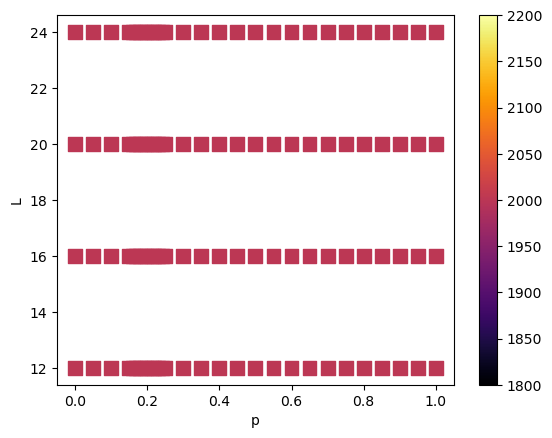

In [146]:
visualize_dataset(df_AFM_FB,xlabel='p',ylabel='L',)

In [147]:
data_AFM_noFB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.16,.25,10)))
# generate_params_3(nu=0,de=1,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=False,filename=None,exist=True,filelist=None,load=True,data_dict=data_AFM_noFB_dict)


data_AFM_noFB_dict=data_AFM_noFB_dict=generate_params(
    fixed_params={'nu':0,'de':1,'feedback':'noFB','AFM':"AFM"},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer3_{AFM}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed} -feedback',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer3_adder_AFM_{feedback}.pickle'
)

df_AFM_noFB=convert_pd(data_AFM_noFB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 232000/232000 [00:39<00:00, 5862.68it/s]


In [148]:
df_AFM_noFB


observations
Metrics p    L                                                    
TMI     0.00 12  [-2.6901191109540243, -2.696041187322605, -2.6...
EE      0.00 12  [3.667372724777511, 3.6643101763908823, 3.6552...
O       0.00 12  [0.00809293598161769, 0.0009488407046008932, -...
TMI     0.05 12  [-0.7111942164389675, -2.662686044222114, -2.4...
EE      0.05 12  [2.2558935983300556, 3.646901092772615, 3.4955...
...                                                            ...
        0.95 24  [0.18458581199592594, 0.19670003384499282, 0.0...
O       0.95 24  [0.1666666666666667, -1.3877787807814457e-17, ...
TMI     1.00 24  [0.004384360413804407, 0.00790636618015971, 0....
EE      1.00 24  [0.004384360413811612, 0.007906366180167162, 0...
O       1.00 24  [-0.16666666666666666, 9.75781955236954e-19, -...

[348 rows x 1 columns]

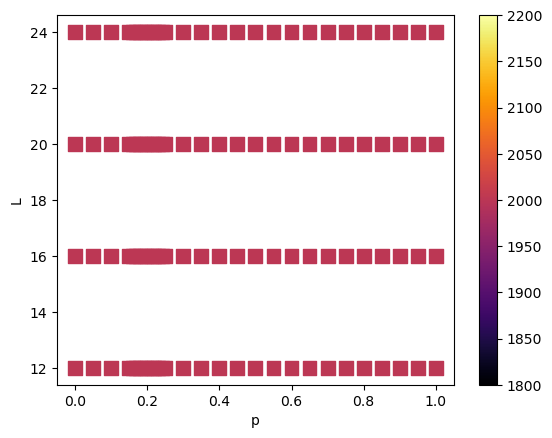

In [149]:
visualize_dataset(df_AFM_noFB,xlabel='p',ylabel='L',)

In [154]:
data3_1_3_FB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.10,.25,16)))
# generate_params_3(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=True,filename=None,exist=True,filelist=None,load=True,data_dict=data3_1_3_FB_dict,AFM=False)

L_list= [12,16,20,24]
data3_1_3_FB_dict=generate_params(
    fixed_params={'nu':1,'de':3,'feedback':'FB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer3_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer3_adder_{nu}-{de}_{feedback}.pickle'
)

df3_1_3_FB=convert_pd(data3_1_3_FB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 264000/264000 [00:44<00:00, 5900.70it/s]


In [155]:
df3_1_3_FB

observations
Metrics p    L                                                    
TMI     0.00 12  [-2.6901191109540243, -2.696041187322605, -2.6...
EE      0.00 12  [3.667372724777511, 3.6643101763908823, 3.6552...
O       0.00 12  [0.00809293598161769, 0.0009488407046008932, -...
TMI     0.05 12  [-1.1214590183925792, -2.6454438051254505, -2....
EE      0.05 12  [2.501695490265655, 3.6368259975168904, 3.6236...
...                                                            ...
        0.95 24  [1.4417279813120607e-15, 1.885817191162123e-15...
O       0.95 24  [0.6666666666666666, 0.5904442707191458, 0.499...
TMI     1.00 24  [-5.319356679874439e-15, -5.5414012847994694e-...
EE      1.00 24  [2.107861796087155e-15, 1.885817191162123e-15,...
O       1.00 24  [0.6666666666666666, 0.6666666666666665, 0.666...

[396 rows x 1 columns]

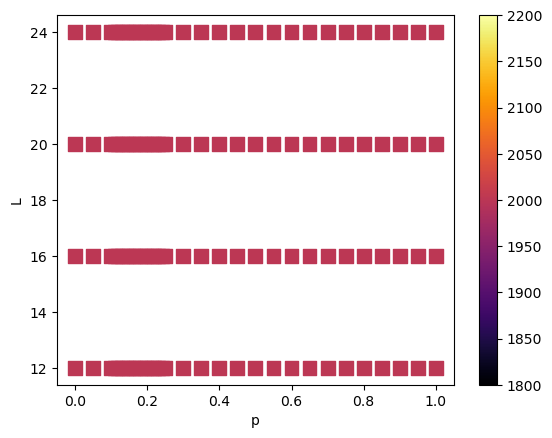

In [156]:
visualize_dataset(df3_1_3_FB,xlabel='p',ylabel='L',)

In [157]:
data3_1_3_noFB_dict={'fn':[]}
p_list=np.linspace(0,1,21)
p_list = reduce(np.union1d,(p_list,np.linspace(.10,.25,16)))
# generate_params_3(nu=1,de=3,L_list=[12,16,20,24],seed_list=range(2000),p_list=p_list,feedback=False,filename=None,exist=True,filelist=None,load=True,data_dict=data3_1_3_noFB_dict,AFM=False)
# df3_1_3_noFB=convert_pd(data3_1_3_noFB_dict)


L_list= [12,16,20,24]
data3_1_3_noFB_dict=generate_params(
    fixed_params={'nu':1,'de':3,'feedback':'noFB',},
    vary_params={'L':L_list,'p':p_list,'seed':range(2000),},
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{seed}_{feedback}.pickle',
    fn_dir_template='bricklayer3_{nu}-{de}_{feedback}',
    input_params_template='{nu} {de} {L} {p:.2f} {seed}',
    load_data=load_pickle,
    filename=None, # 'params.txt'
    filelist=None,
    load=True,
    data_dict=None,
    data_dict_file='bricklayer3_adder_{nu}-{de}_{feedback}.pickle'
)

df3_1_3_noFB=convert_pd(data3_1_3_noFB_dict,names=['Metrics','p','L'])

generate_params: 100%|██████████| 264000/264000 [00:44<00:00, 5880.51it/s]


In [158]:
df3_1_3_noFB

observations
Metrics p    L                                                    
TMI     0.00 12  [-2.6901191109540243, -2.696041187322605, -2.6...
EE      0.00 12  [3.667372724777511, 3.6643101763908823, 3.6552...
O       0.00 12  [0.00809293598161769, 0.0009488407046008932, -...
TMI     0.05 12  [-1.1233014916019206, -2.6667618058716807, -2....
EE      0.05 12  [2.537156887158599, 3.6469695308862082, 3.6133...
...                                                            ...
        0.95 24  [1.4417279813120607e-15, 1.885817191162123e-15...
O       0.95 24  [-0.16666666666666666, 0.22586400688986727, -0...
TMI     1.00 24  [-5.319356679874438e-15, -5.5414012847994694e-...
EE      1.00 24  [2.3299064010121857e-15, 1.885817191162123e-15...
O       1.00 24  [-0.16666666666666663, -0.0, -0.0, 0.499999999...

[396 rows x 1 columns]

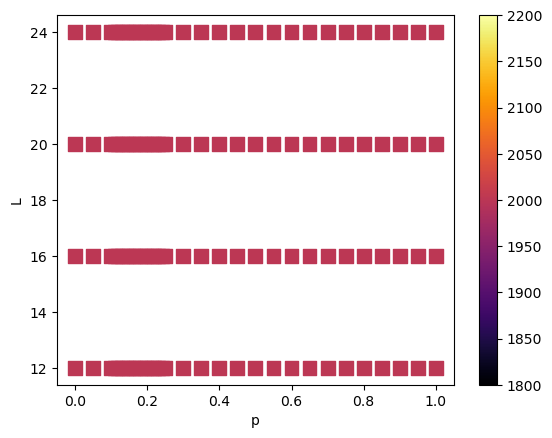

In [159]:
visualize_dataset(df3_1_3_noFB,xlabel='p',ylabel='L',)

# Plot

## API

In [31]:
import matplotlib.pyplot as plt
import scipy
from functools import partial

In [32]:
import matplotlib.patches as mpatches

In [43]:
def plot_line(df,ax=None,params={'Metrics':'O','p':0,},L_list=None,yscale=None,ylim=None,method=np.mean,errorbar=False):
    if ax is None:
        fig,ax=plt.subplots()
    assert method in {np.mean,np.var}, f'the method should be either np.mean or np.var. {method} is not currently supported.'
    x_name='p'
    title_name='p'
    op_str={np.mean:r'\overline',np.var:r'Var~'}
    ylabel_name={'O':rf'${op_str[method]}{{\langle O \rangle}}$','EE':rf'${op_str[method]}{{ S_{{L/2}} }}$','TMI':rf'${op_str[method]}{{I_3}}$','SA':rf'${op_str[method]}{{ S_{{anc}} }}$'}
    df=df.xs(params.values(),level=list(params.keys()))
    if L_list is None:
        L_list=np.sort(df.index.get_level_values('L').unique())
    colormap = (plt.cm.Blues(0.4+0.6*(i/L_list.shape[0])) for i in range(L_list.shape[0]))
    for L in sorted(L_list):
        dd=df.xs(key=L,level='L')['observations'].apply(method)
        if errorbar:
            if method is np.mean:
                dd_se=df.xs(key=L,level='L')['observations'].apply(np.std).values/np.sqrt(df.xs(key=L,level='L')['observations'].apply(len).values)
            if method is np.var:
                mu4=df.xs(key=L,level='L')['observations'].apply(partial(scipy.stats.moment,moment=4)).values
                mu2=df.xs(key=L,level='L')['observations'].apply(partial(scipy.stats.moment,moment=2)).values
                n=(df.xs(key=L,level='L')['observations'].apply(len).values)
                dd_se=np.sqrt((mu4-(n-3)/(n-1)*mu2**2)/n)
                
        x=dd.index.get_level_values(x_name)
        arg_sort=x.argsort()
        if yscale == 'log' and params['Metrics']== 'TMI':
            dd_sort=np.abs(dd.values[arg_sort])
            ylabel_name['TMI']=rf'${op_str[method]}{{|I_3|}}$'

        else:
            dd_sort=dd.values[arg_sort]
        if errorbar:
            ax.errorbar(x[arg_sort],dd_sort,yerr=dd_se[arg_sort],label=f'L={L}',lw=1,color=colormap.__next__(),capsize=2)
        else:
            ax.plot(x[arg_sort],dd_sort,'.-',label=f'L={L}',lw=1,color=colormap.__next__())
    ax.legend()
    if ylim is not None:
        ax.set_ylim(ylim)
    if yscale is not None:
        ax.set_yscale(yscale)
    ax.set_ylabel(ylabel_name[params['Metrics']])
    ax.set_xlabel(x_name)
    # ax.set_title(f'{title_name}={params[title_name]:.2f}')

In [44]:
def plot_inset(data,ax,xlim,ylim,ax_inset_pos,L_list,params,yscale,method):
    # .27,.3
    # .6,.63
    axins = ax.inset_axes(ax_inset_pos,transform=ax.transAxes)
    plot_line(data,params=params,ax=axins,L_list=L_list,yscale=yscale,method=method)
    axins.grid('on')
    axins.set_xlim(xlim)
    axins.set_ylim(ylim)
    axins.legend().remove()
    axins.set_ylabel('')
    axins.set_title('')
    axins.set_xlabel('')
    rect=mpatches.Rectangle((xlim[0],ylim[0]),xlim[1]-xlim[0],ylim[1]-ylim[0],ls='dashed',fill=None,lw=0.5,zorder=10)
    ax.add_patch(rect)
    if xlim[0]>=0.6*(ax_inset_pos[0]) and xlim[1]>=0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[1])
        inset_coord_1=(0,1)
        dashed_coord_2=(xlim[1],ylim[0])
        inset_coord_2=(1,0)
    elif xlim[0]>=0.6*(ax_inset_pos[0]) and xlim[1]<0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[1])
        inset_coord_1=(0,1)
        dashed_coord_2=(xlim[1],ylim[1])
        inset_coord_2=(1,1)
    elif xlim[0]<0.6*(ax_inset_pos[0]) and xlim[1]<0.6*(ax_inset_pos[0]+ax_inset_pos[1]):
        dashed_coord_1=(xlim[0],ylim[0])
        inset_coord_1=(0,0)
        dashed_coord_2=(xlim[1],ylim[1])
        inset_coord_2=(1,1)

    line1=mpatches.ConnectionPatch(dashed_coord_1, inset_coord_1, coordsA='data',coordsB='axes fraction',axes=ax,axesB=axins,ls='dashed',lw=0.5)
    ax.add_patch(line1)
    line2=mpatches.ConnectionPatch(dashed_coord_2, inset_coord_2, coordsA='data',coordsB='axes fraction',axes=ax,axesB=axins,ls='dashed',lw=0.5)
    ax.add_patch(line2)


In [45]:
def plot_SA_2(df_anc,L_list,xlim1,xlim2,ylim1,ylim2,ax_inset_pos1,ax_inset_pos2,metrics,p_ctrl=None,inset1=False,inset2=False,yscale=None,filename=None,dirpath='Fig',ylim=None,errorbar=False,method=np.mean):
    fig,ax=plt.subplots(figsize=(6.8,5))
    params={'Metrics':metrics,}
    # adder=df_anc.index.get_level_values('adder').unique().tolist()[0]
    plot_line(df_anc,params=params,ax=ax,L_list=L_list,yscale=yscale,ylim=ylim,errorbar=errorbar,method=method)
    ax.grid('on')
    ax.set_xlim(0,0.6)
    if inset1:
        plot_inset(df_anc,ax,xlim=xlim1,ylim=ylim1,ax_inset_pos=ax_inset_pos1,params=params,L_list=L_list,yscale=yscale,method=method)

    if inset2:
        plot_inset(df_anc,ax,xlim=xlim2,ylim=ylim2,ax_inset_pos=ax_inset_pos2,params=params,L_list=L_list,yscale=yscale,method=method)
    

    if filename is not None:
        if filename== 'auto':
            method_name={np.mean:'mean',np.var:'var'}
            filename=''
            # filename= f'{metrics}_{method_name[method]}_L({L_list[0]},{L_list[-1]}){"_log" if yscale else ""}_adder({adder[0]}-{adder[1]}).png'
        print(filename)
        # plt.subplots_adjust(left=(.8)/fig.get_size_inches()[0],right=1-(.1)/fig.get_size_inches()[0],bottom=.5/fig.get_size_inches()[1],top=1-.2/fig.get_size_inches()[1])
        # fig.savefig(os.path.join(dirpath,filename),)

In [46]:
from matplotlib.colors import LogNorm
import torch
class Optimizer:
    def __init__(self,p_c,nu,df,params={'Metrics':'O',},p_range=[-0.1,0.1],Lmin=None,Lmax=None,bootstrap=False,gaussian_check=False):
        self.p_c=torch.tensor([p_c],requires_grad=False)
        self.nu=torch.tensor([nu],requires_grad=False)
        self.p_range=p_range
        self.Lmin=0 if Lmin is None else Lmin
        self.Lmax=100 if Lmax is None else Lmax
        self.bootstrap=bootstrap
        self.gaussian_check=gaussian_check
        self.params=params
        self.df=self.load_dataframe(df,params)
        self.L_i,self.p_i,self.d_i,self.y_i = self.load_data()

    
    def load_dataframe(self,df,params):
        df=df.xs(params.values(),level=list(params.keys()))['observations']
        df=df[(df.index.get_level_values('p')<=self.p_c.item()+self.p_range[1]) & (self.p_c.item()+self.p_range[0]<=df.index.get_level_values('p'))]
        df=df[(df.index.get_level_values('L')<=self.Lmax) & (self.Lmin<=df.index.get_level_values('L'))]
        if self.bootstrap:
            df=df.apply(lambda x: list(np.random.choice(x,size=len(x),replace=True)))
        if self.gaussian_check:
            print(df.apply(scipy.stats.shapiro))
        return df
    
    def load_data(self):
        L_i=torch.from_numpy(self.df.index.get_level_values('L').values)
        p_i=torch.from_numpy(self.df.index.get_level_values('p').values)
        d_i=torch.from_numpy(self.df.apply(np.std).values)/np.sqrt(self.df.apply(len).values)
        y_i=torch.from_numpy(self.df.apply(np.mean).values)
        assert p_i.unique().shape[0]>=4, f'not enough data points {p_i.unique().shape[0]}'
        return L_i,p_i,d_i,y_i

    def loss(self,p_c,nu,MLE=True):
        x_i=(self.p_i-p_c)*(self.L_i)**(1/nu)
        order=x_i.argsort()
        x_i_ordered=x_i[order]
        y_i_ordered=self.y_i[order]
        d_i_ordered=self.d_i[order]
        x={i:x_i_ordered[1+i:x_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        d={i:d_i_ordered[1+i:d_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        y={i:y_i_ordered[1+i:y_i_ordered.shape[0]-1+i] for i in [-1,0,1]}
        x_post_ratio=(x[1]-x[0])/(x[1]-x[-1])
        x_pre_ratio=(x[-1]-x[0])/(x[1]-x[-1])
        y_var=d[0]**2+(x_post_ratio*d[-1])**2+(x_pre_ratio*d[1])**2
        y_bar=x_post_ratio*y[-1]-x_pre_ratio*y[1]
        # return torch.sum((y[0]-y_bar)**2/y_var)
        if MLE:
            return self.MLE(y[0],y_bar,y_var)
        else:
            return self.chi2(y[0],y_bar,y_var)
    
    def loss_shift(self,p_c,nu,omega,a,b,c,d,):
        x_i=(self.p_i-p_c)*(self.L_i)**(1/nu)
        y_var=self.d_i**2
        self.y_i_fitted=a+b*x_i+c*x_i**2+d/self.L_i**omega
        return self.chi2(self.y_i_fitted,self.y_i,y_var)

    def chi2(self,y,y_fitted,sigma2):
        return 0.5*torch.sum((y-y_fitted)**2/sigma2)
    
    def MLE(self,y,y_fitted,sigma2):
        return 0.5*torch.sum((y-y_fitted)**2/sigma2)+0.5*torch.sum(torch.log(sigma2))

    
    def visualize(self,p_c_range,nu_range,trajectory=False,fig=True,ax=None,mapfunc=lambda x:x):
        p_c_list=np.linspace(*p_c_range,82)
        nu_list=np.linspace(*nu_range,80)
        loss_map=np.array([[self.loss(torch.tensor([p_c]),torch.tensor([nu]),MLE=False).item() for p_c in p_c_list] for nu in nu_list])
        if fig:
            if ax is None:
                fig, ax = plt.subplots()
            cm=ax.contourf(p_c_list,nu_list,mapfunc(loss_map),levels=20)
            ax.set_xlabel(r'$p_c$')
            ax.set_ylabel(r'$\nu$')
            plt.colorbar(cm)
            if trajectory:
                ax.scatter(self.p_c_history,self.nu_history,s=np.linspace(3,1,len(self.p_c_history))**2,)
            ct=ax.contour(p_c_list,nu_list,mapfunc(loss_map),levels=[mapfunc(self.loss(self.p_c,self.nu,MLE=False).item()*1.3),],colors='k',linestyles='dashed')
        else:
            ct=plt.contour(p_c_list,nu_list,mapfunc(loss_map),levels=[mapfunc(self.loss(self.p_c,self.nu,MLE=False).item()*1.3),],colors='k',linestyles='dashed');
        params_range=ct.collections[0].get_paths()[0].vertices
        return params_range[:,0].min(),params_range[:,0].max(),params_range[:,1].min(),params_range[:,1].max()

    def optimize(self,tolerance=1e-10):
        p_c_prime = torch.tensor([torch.logit(self.p_c)],requires_grad=True)
        nu_prime = torch.tensor([torch.log(self.nu)],requires_grad=True)
        optimizer=torch.optim.Adam([p_c_prime,nu_prime],)
        # optimizer=torch.optim.Adam([self.p_c,self.nu],)
        prev_loss=float('inf')
        current_loss=0
        self.loss_history=[]
        # self.p_c_history=[self.p_c.item()]
        # self.nu_history=[self.nu.item()]
        self.p_c_history=[torch.sigmoid(p_c_prime).item()]
        self.nu_history=[torch.exp(nu_prime).item()]
        iteration=0
        while abs(prev_loss-current_loss)>tolerance and iteration<10000:
            p_c_transformed = torch.sigmoid(p_c_prime)
            nu_transformed = torch.exp(nu_prime)

            loss_ = self.loss(p_c_transformed, nu_transformed,MLE=False)
            # loss_=self.loss(self.p_c,self.nu)
            optimizer.zero_grad()
            loss_.backward()
            optimizer.step()
            prev_loss=current_loss
            current_loss=loss_.item()
            self.loss_history.append(current_loss)
            self.p_c_history.append(p_c_transformed.item())
            self.nu_history.append(nu_transformed.item())
            # self.p_c_history.append(self.p_c.item())
            # self.nu_history.append(self.nu.item())
            iteration+=1
        self.p_c = torch.sigmoid(p_c_prime)
        self.nu = torch.exp(nu_prime)
        Hessian= torch.tensor(torch.autograd.functional.hessian(self.loss,(self.p_c,self.nu)))
        self.se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        
        return {'p_c':self.p_c.item(),'nu':self.nu.item(),'loss':current_loss*2/(self.y_i.shape[0]-2),'se':self.se.detach().numpy()}
    def optimize_scipy(self):
        func=lambda x: self.loss(torch.tensor([x[0]]),torch.tensor([x[1]]),MLE=False).item()
        res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='Nelder-Mead',bounds=[(0,1),(0,2)])
        # res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item()],method='L-BFGS-B',bounds=[(0,1),(0,5)])
        # 'L-BFGS-B',bounds=[(0,1),(0,5)]
        Hessian= torch.tensor(torch.autograd.functional.hessian(self.loss,(torch.tensor(res.x[0]),torch.tensor(res.x[1]))))
        se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        self.p_c=torch.tensor([res.x[0]])
        self.nu=torch.tensor([res.x[1]])
        return res,res.fun*2/(self.y_i.shape[0]-2),se

    def optimize_shift(self,omega,a,b,c,d,tolerance=1e-10,):
        p_c_prime = torch.tensor([torch.logit(self.p_c)],requires_grad=True)
        nu_prime = torch.tensor([torch.log(self.nu)],requires_grad=True)
        omega=torch.tensor([omega],requires_grad=True,dtype=torch.float32)
        a=torch.tensor([a],requires_grad=True,dtype=torch.float32)
        b=torch.tensor([b],requires_grad=True,dtype=torch.float32)
        c=torch.tensor([c],requires_grad=True,dtype=torch.float32)
        d=torch.tensor([d],requires_grad=True,dtype=torch.float32)
        optimizer=torch.optim.Adam([p_c_prime,nu_prime,omega,a,b,c,d],)
        prev_loss=float('inf')
        current_loss=0
        self.loss_history=[]
        self.p_c_history=[torch.sigmoid(p_c_prime).item()]
        self.nu_history=[torch.exp(nu_prime).item()]
        iteration=0
        while abs(prev_loss-current_loss)>tolerance and iteration<100000:
            p_c_transformed = torch.sigmoid(p_c_prime)
            nu_transformed = torch.exp(nu_prime)

            loss_ = self.loss_shift(p_c_transformed, nu_transformed,omega,a,b,c,d)
            optimizer.zero_grad()
            loss_.backward()
            optimizer.step()
            prev_loss=current_loss
            current_loss=loss_.item()
            self.loss_history.append(current_loss)
            self.p_c_history.append(p_c_transformed.item())
            self.nu_history.append(nu_transformed.item())
            iteration+=1
        self.p_c = torch.sigmoid(p_c_prime)
        self.nu = torch.exp(nu_prime)
        return {'p_c':self.p_c.item(),'nu':self.nu.item(),'omega':omega.item(),'a':a.item(),'b':b.item(),'c':c.item(),'d':d.item(),'loss':current_loss,'chi-square_nu':current_loss*2/(self.y_i.shape[0]-7)}

    def optimize_shift_scipy(self,omega,a,b,c,d):
        func=lambda x: self.loss_shift(*tuple(x)).item()
        res=scipy.optimize.minimize(func,[self.p_c.item(),self.nu.item(),omega,a,b,c,d],method='Nelder-Mead')
        Hessian= torch.tensor(torch.autograd.functional.hessian(lambda x: self.loss_shift(*x),torch.tensor(res.x)))
        se=torch.sqrt(torch.diag(torch.inverse(Hessian)))
        self.p_c=torch.tensor([res.x[0]])
        self.nu=torch.tensor([res.x[1]])
        return res,res.fun*2/(self.y_i.shape[0]-7),se

    def plot_loss(self):
        if hasattr(self, 'loss_history'):
            fig,ax=plt.subplots()
            ax.plot(self.loss_history,'.-')
            ax.set_xlabel('Iteration')
            ax.set_ylabel('O')
    
    def plot_data_collapse(self,ax=None):
        x_i=(self.p_i-self.p_c)*(self.L_i)**(1/self.nu)
        # x_i=self.p_i
        if ax is None:
            fig,ax = plt.subplots()
        L_list=self.df.index.get_level_values('L').unique().sort_values().values
        idx_list=[0]+(np.cumsum([self.df.xs(key=L,level='L').shape[0] for L in L_list])).tolist()
        L_dict={L:(start_idx,end_idx) for L,start_idx,end_idx in zip(L_list,idx_list[:-1],idx_list[1:])}
        for L,(start_idx,end_idx) in L_dict.items():
            ax.scatter(x_i.detach().numpy()[start_idx:end_idx],self.y_i.detach().numpy()[start_idx:end_idx],label=f'{L}')
            # ax.plot(x_i.detach().numpy()[start_idx:end_idx],self.y_i_fitted.detach().numpy()[start_idx:end_idx],label=f'{L}')
        ax.set_xlabel(r'$(p_i-p_c)L^{1/\nu}$')
        ax.set_ylabel(r'$y_i$')
        ax.legend()
        ax.grid('on')
        ax.set_title(rf'$p_c={self.p_c.item():.3f},\nu={self.nu.item():.3f}$')

        # adder=self.df.index.get_level_values('adder').unique().tolist()[0]
        # print(f'{self.params["Metrics"]}_Scaling_L({L_list[0]},{L_list[-1]})_adder({adder[0]}-{adder[1]}).png')
        
    
    def plot_line(self):
        fig,ax=plt.subplots()
        ax.plot(self.p_i,self.y_i)


## Bricklayer 1

### +0

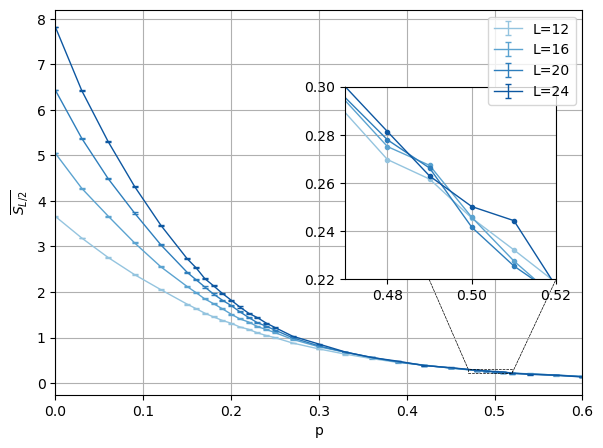

In [47]:
plot_SA_2(df_0_1,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')

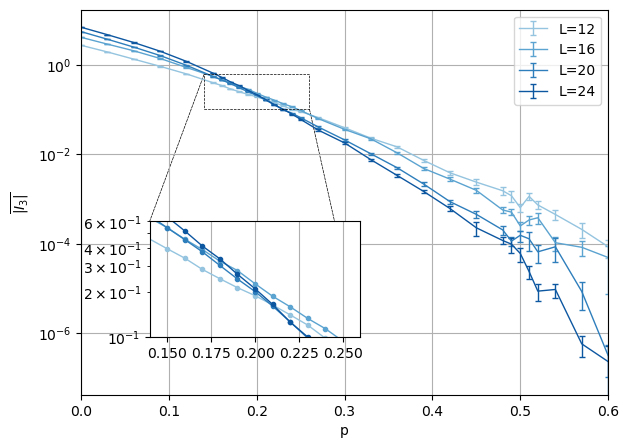

In [48]:
plot_SA_2(df_0_1,L_list=np.arange(12,25,4),inset1=True,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [49]:
optim=Optimizer(p_c=0.2,nu=1.3,df=df_0_1,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [50]:
optim.optimize_scipy()
# optim.optimize_shift_scipy(omega=3,a=-2e-1,b=-0.02,c=-0.001,d=-0.0001)

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 218.13555379433706
              x: [ 1.839e-01  1.368e+00]
            nit: 26
           nfev: 53
  final_simplex: (array([[ 1.839e-01,  1.368e+00],
                        [ 1.839e-01,  1.368e+00],
                        [ 1.839e-01,  1.368e+00]]), array([ 2.181e+02,  2.181e+02,  2.181e+02])),
 10.906777689716852,
 tensor([0.0010, 0.0362], dtype=torch.float64))

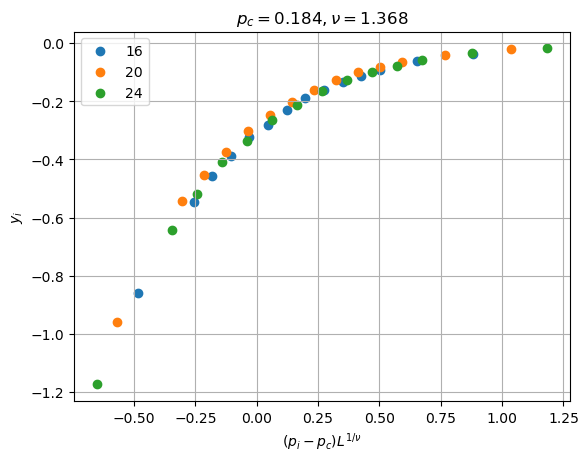

In [51]:
optim.plot_data_collapse()

In [68]:
optim=Optimizer(p_c=0.48,nu=1.,df=df_0_1,params={'Metrics':'EE',},Lmin=16,p_range=[-0.00,0.07])

In [69]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 5.18287208329591
              x: [ 5.125e-01  2.000e+00]
            nit: 36
           nfev: 69
  final_simplex: (array([[ 5.125e-01,  2.000e+00],
                        [ 5.124e-01,  2.000e+00],
                        [ 5.125e-01,  2.000e+00]]), array([ 5.183e+00,  5.183e+00,  5.183e+00])),
 0.6478590104119888,
 tensor([0.0172, 1.2064], dtype=torch.float64))

EE_Scaling_L(16,24)_adder(0-1).png


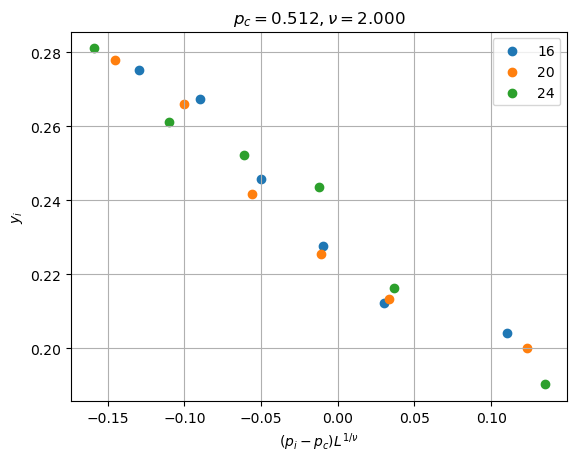

In [70]:
optim.plot_data_collapse()

### +1/3

EE_mean_L(12,24)_adder(1-3).png


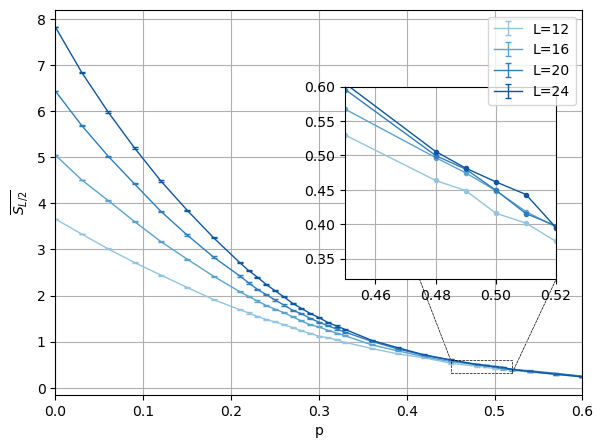

In [35]:
plot_SA_2(df_1_3,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.45,0.52],ylim2=[3.2e-1,6e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(1-3).png


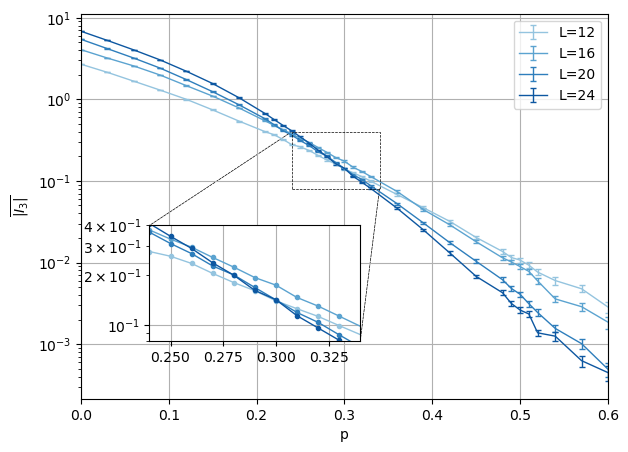

In [36]:
plot_SA_2(df_1_3,L_list=np.arange(12,25,4),inset1=True,xlim1=[.24,.34],ylim1=[.08,.4],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [40]:
optim=Optimizer(p_c=0.25,nu=1.3,df=df_1_3,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [41]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 155.9681259667383
              x: [ 2.543e-01  1.287e+00]
            nit: 49
           nfev: 97
  final_simplex: (array([[ 2.543e-01,  1.287e+00],
                        [ 2.543e-01,  1.287e+00],
                        [ 2.543e-01,  1.287e+00]]), array([ 1.560e+02,  1.560e+02,  1.560e+02])),
 7.25433144031341,
 tensor([0.0010, 0.0242], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1-3).png


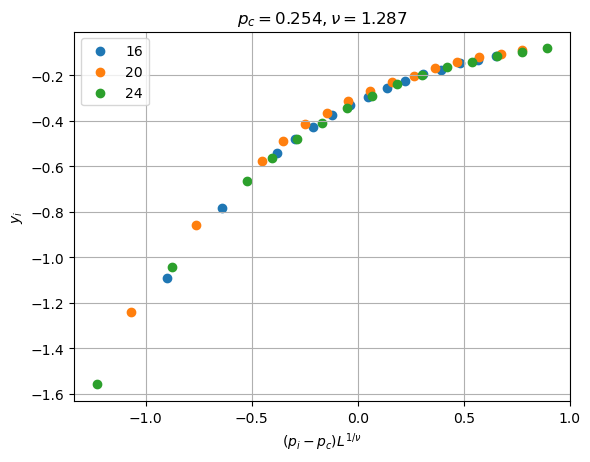

In [39]:
optim.plot_data_collapse()

In [145]:
optim=Optimizer(p_c=0.48,nu=1.,df=df_1_3,params={'Metrics':'EE',},Lmin=16,p_range=[-0.1,0.1])

In [146]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 19.517899749062096
              x: [ 5.019e-01  2.000e+00]
            nit: 30
           nfev: 55
  final_simplex: (array([[ 5.019e-01,  2.000e+00],
                        [ 5.018e-01,  2.000e+00],
                        [ 5.018e-01,  2.000e+00]]), array([ 1.952e+01,  1.952e+01,  1.952e+01])),
 1.3941356963615783,
 tensor([0.0062, 0.1605], dtype=torch.float64))

EE_Scaling_L(16,24)_adder(1-3).png


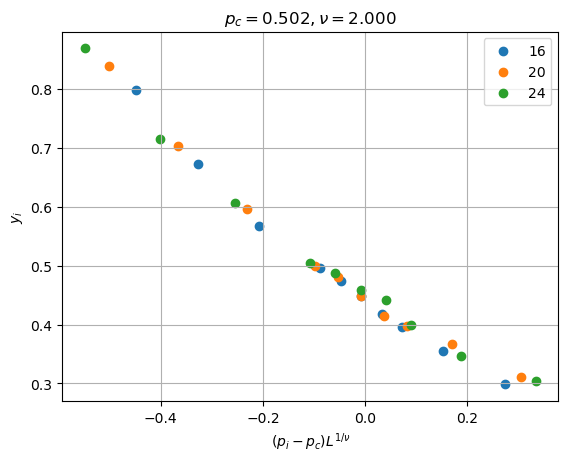

In [147]:
optim.plot_data_collapse()

### +2/3

EE_mean_L(12,24)_adder(2-3).png


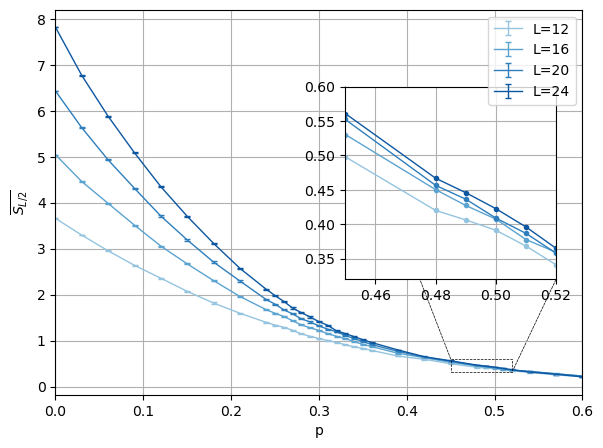

In [47]:
plot_SA_2(df_2_3,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.45,0.52],ylim2=[3.2e-1,6e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(2-3).png


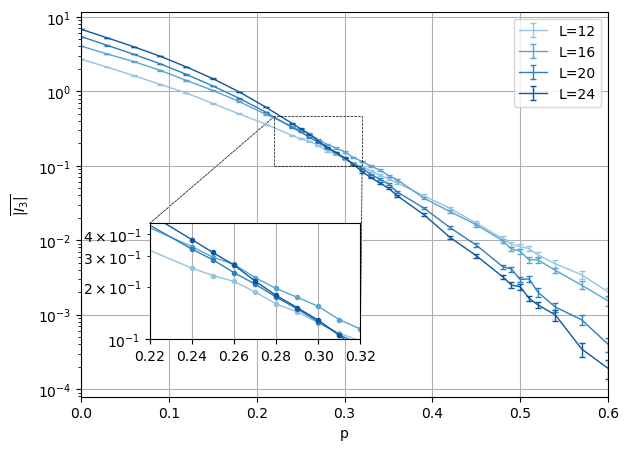

In [48]:
plot_SA_2(df_2_3,L_list=np.arange(12,26,4),inset1=True,xlim1=[.22,.32],ylim1=[.1,.46],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [52]:
optim=Optimizer(p_c=0.25,nu=1.3,df=df_2_3,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [53]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 127.2223368876982
              x: [ 2.554e-01  1.326e+00]
            nit: 41
           nfev: 81
  final_simplex: (array([[ 2.554e-01,  1.326e+00],
                        [ 2.554e-01,  1.326e+00],
                        [ 2.554e-01,  1.326e+00]]), array([ 1.272e+02,  1.272e+02,  1.272e+02])),
 5.917317994776661,
 tensor([0.0012, 0.0256], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(2-3).png


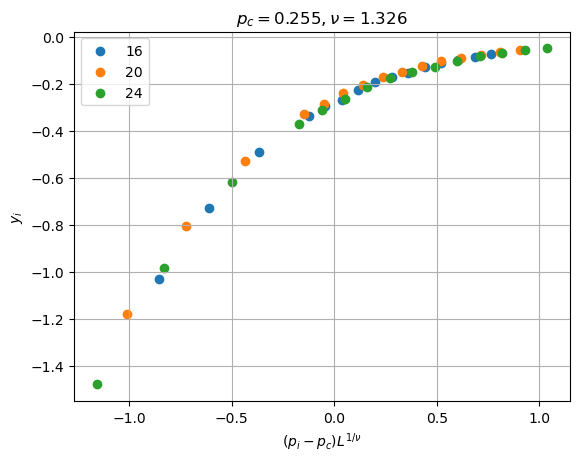

In [54]:
optim.plot_data_collapse()

### +1/2

EE_mean_L(12,24)_adder(1-2).png


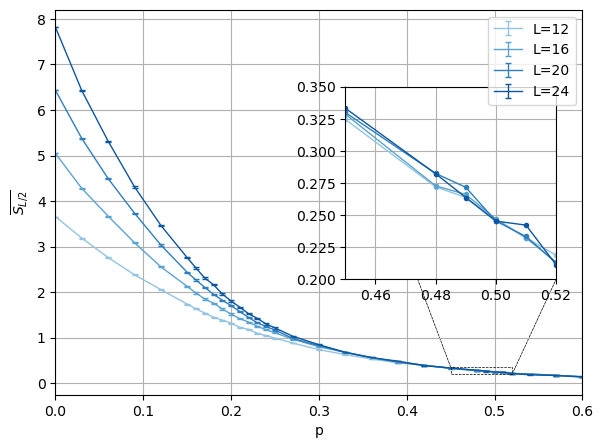

In [59]:
plot_SA_2(df_1_2,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.45,0.52],ylim2=[2.e-1,3.5e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(1-2).png


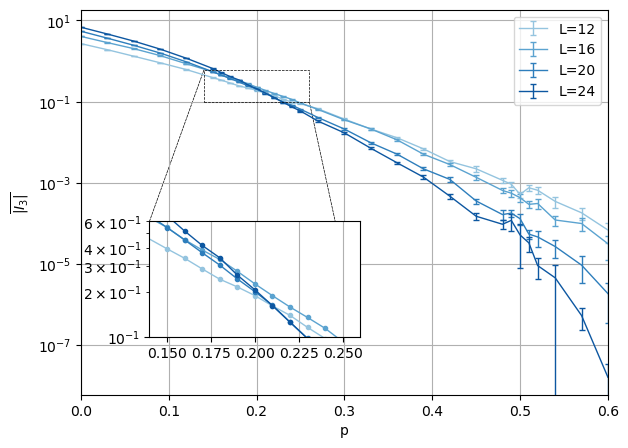

In [60]:
plot_SA_2(df_1_2,L_list=np.arange(12,26,4),inset1=True,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [62]:
optim=Optimizer(p_c=0.18,nu=1.3,df=df_1_2,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [63]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 214.5614851589236
              x: [ 1.795e-01  1.335e+00]
            nit: 23
           nfev: 47
  final_simplex: (array([[ 1.795e-01,  1.335e+00],
                        [ 1.795e-01,  1.335e+00],
                        [ 1.795e-01,  1.335e+00]]), array([ 2.146e+02,  2.146e+02,  2.146e+02])),
 10.72807425794618,
 tensor([0.0010, 0.0275], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1-2).png


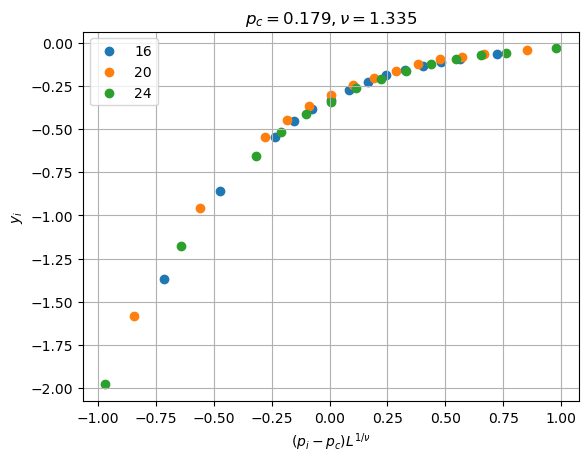

In [64]:
optim.plot_data_collapse()

### +1/6

EE_mean_L(12,24)_adder(1-6).png


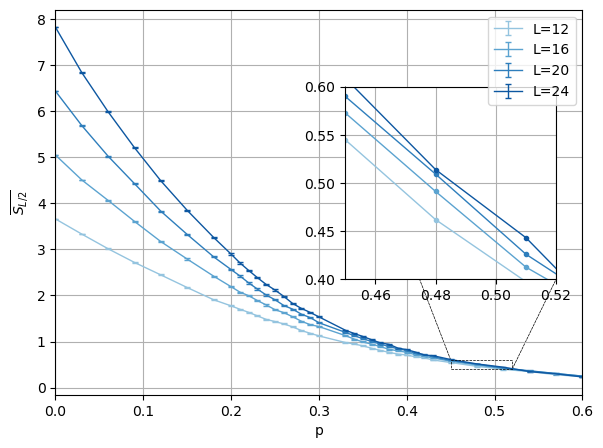

In [65]:
plot_SA_2(df_1_6,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.45,0.52],ylim2=[4.e-1,6e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(1-6).png


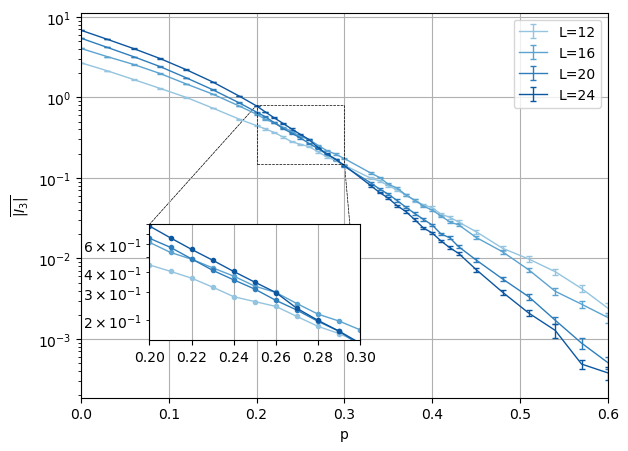

In [66]:
plot_SA_2(df_1_6,L_list=np.arange(12,26,4),inset1=True,xlim1=[.20,.30],ylim1=[.15,0.8],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [77]:
optim=Optimizer(p_c=0.26,nu=1.3,df=df_1_6,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.08,0.08])

In [78]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 153.7878232987427
              x: [ 2.579e-01  1.356e+00]
            nit: 26
           nfev: 52
  final_simplex: (array([[ 2.579e-01,  1.356e+00],
                        [ 2.579e-01,  1.356e+00],
                        [ 2.579e-01,  1.356e+00]]), array([ 1.538e+02,  1.538e+02,  1.538e+02])),
 8.312855313445551,
 tensor([0.0012, 0.0383], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1-6).png


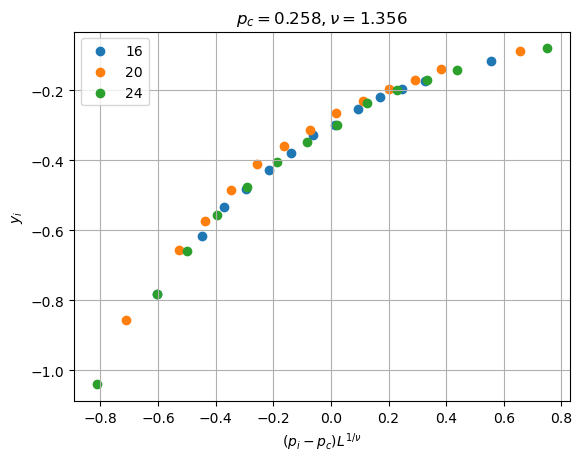

In [79]:
optim.plot_data_collapse()

### No Feedback

O_mean_L(12,24)_adder(1/3,2/3-None).png


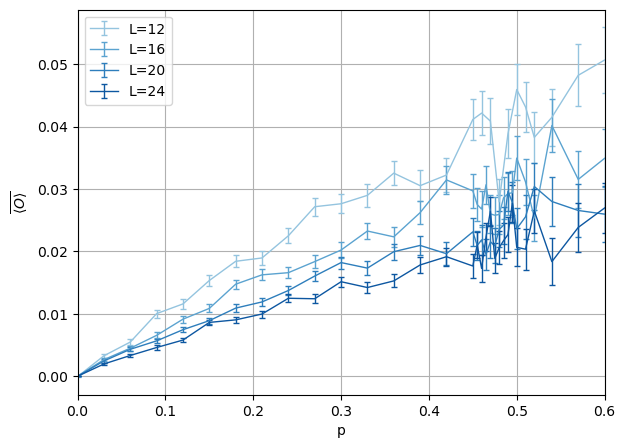

In [124]:
plot_SA_2(df_noFB,L_list=np.arange(12,25,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.45,0.52],ylim2=[0.5,2],ax_inset_pos2=[.1,.2,.4,.5],metrics='O',yscale=None,errorbar=True,filename='auto')

EE_mean_L(12,24)_log_adder(1/3,2/3-None).png


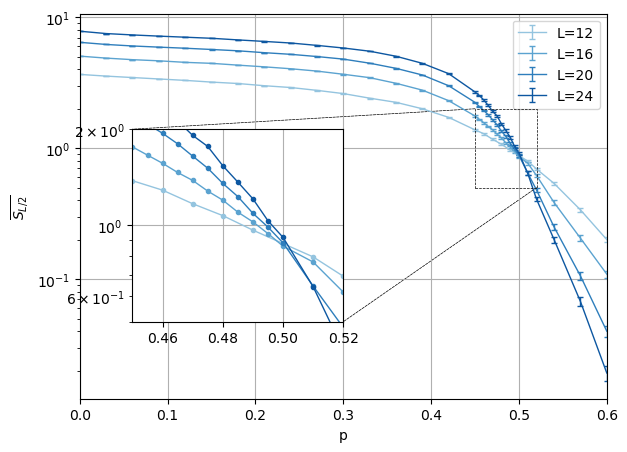

In [33]:
plot_SA_2(df_noFB,L_list=np.arange(12,25,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.45,0.52],ylim2=[0.5,2],ax_inset_pos2=[.1,.2,.4,.5],metrics='EE',yscale='log',errorbar=True,filename='auto')

TMI_mean_L(12,24)_log_adder(1/3,2/3-None).png


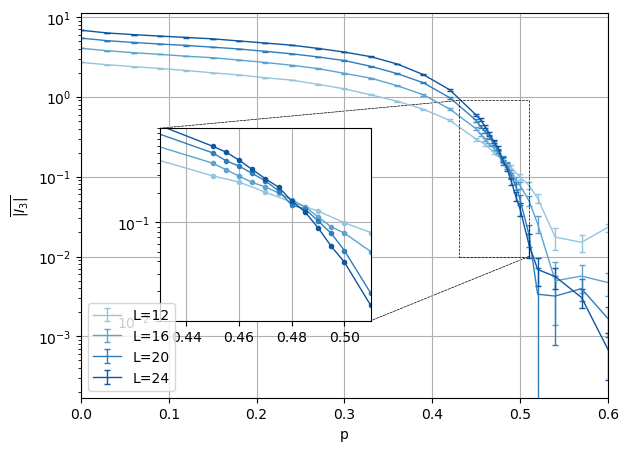

In [35]:
plot_SA_2(df_noFB,L_list=np.arange(12,25,4),inset1=False,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=True,xlim2=[0.43,0.51],ylim2=[0.1e-1,9e-1],ax_inset_pos2=[.15,.2,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')

In [119]:
optim=Optimizer(p_c=0.48,nu=1.,df=df_noFB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.04,0.0])

In [120]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 1.953142864117798
              x: [ 4.842e-01  9.308e-01]
            nit: 55
           nfev: 107
  final_simplex: (array([[ 4.842e-01,  9.308e-01],
                        [ 4.842e-01,  9.308e-01],
                        [ 4.842e-01,  9.307e-01]]), array([ 1.953e+00,  1.953e+00,  1.953e+00])),
 0.24414285801472474,
 tensor([0.0044, 0.2005], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1/3,2/3-None).png


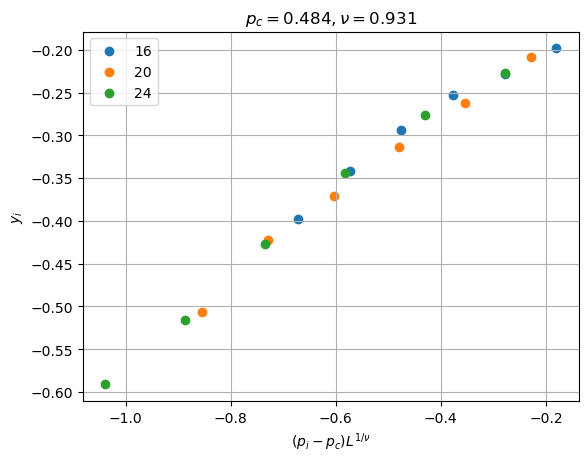

In [121]:
optim.plot_data_collapse()

In [118]:
45109680**2*(128/8)/2**30

30322123.01645279

In [138]:
bin(int(1/6*2**8))

'0b101010'

## Bricklayer 2

### +0 W/ FB

In [22]:
plot_SA_2(df_0_1_FB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

NameError: name 'df_0_1_FB' is not defined

TMI_mean_L(12,24)_log_adder(0-1).png


(0.0, 1.0)

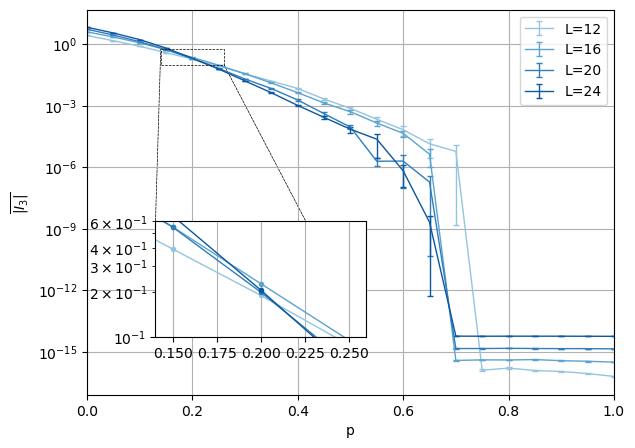

In [27]:
plot_SA_2(df_0_1_FB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

In [28]:
optim=Optimizer(p_c=0.18,nu=1.3,df=df_0_1_FB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [29]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 77.73346951767499
              x: [ 1.824e-01  1.378e+00]
            nit: 26
           nfev: 51
  final_simplex: (array([[ 1.824e-01,  1.378e+00],
                        [ 1.824e-01,  1.378e+00],
                        [ 1.824e-01,  1.378e+00]]), array([ 7.773e+01,  7.773e+01,  7.773e+01])),
 15.546693903534997,
 tensor([0.0025, 0.0737], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(0-1).png


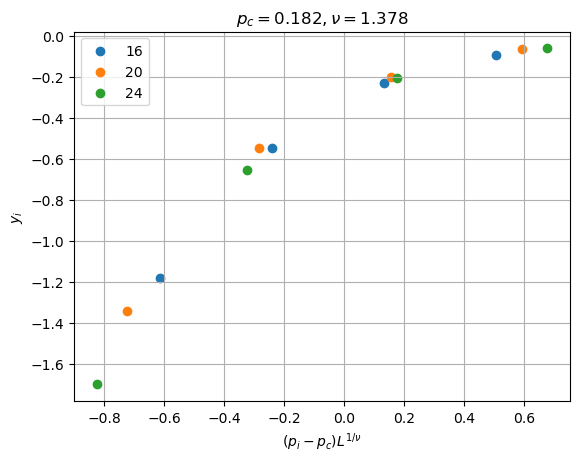

In [31]:
optim.plot_data_collapse()

### +0 W/O FB

EE_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

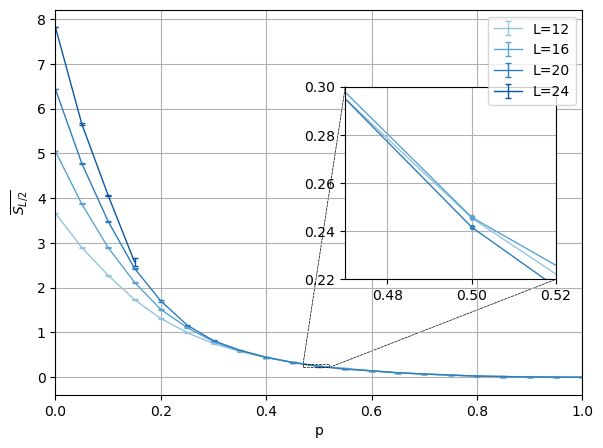

In [41]:
plot_SA_2(df_0_1_noFB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_log_adder(0-1).png


(0.0, 1.0)

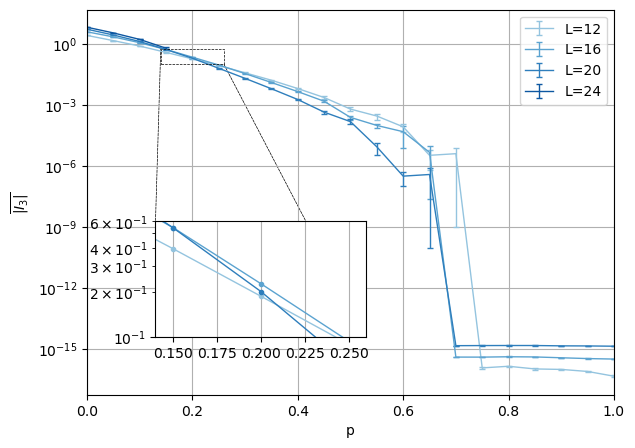

In [42]:
plot_SA_2(df_0_1_noFB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale='log',errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

In [43]:
optim=Optimizer(p_c=0.18,nu=1.3,df=df_0_1_noFB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [44]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 32.10697414450339
              x: [ 1.711e-01  1.406e+00]
            nit: 28
           nfev: 55
  final_simplex: (array([[ 1.711e-01,  1.406e+00],
                        [ 1.711e-01,  1.406e+00],
                        [ 1.711e-01,  1.406e+00]]), array([ 3.211e+01,  3.211e+01,  3.211e+01])),
 8.026743536125847,
 tensor([0.0035, 0.0987], dtype=torch.float64))

In [ ]:
find . -maxdepth 1 -name "*0-1*_FB.pickle" -print0 |xargs -0 mv -t  bricklayer2_0-1_FB

In [ ]:
find . -maxdepth 1 -name "*0-1*_noFB.pickle" -print0 |xargs -0 mv -t  bricklayer2_0-1_noFB

In [ ]:
find . -maxdepth 1 -name "bricklayer3*_FB.pickle" -print0 | xargs -0 mv -t bricklayer3_AFM_FB

In [ ]:
find . -maxdepth 1 -name "bricklayer3*_noFB.pickle" -print0 | xargs -0 mv -t bricklayer3_AFM_noFB

### 1/3

EE_mean_L(12,24)_adder(1-3).png


(0.0, 1.0)

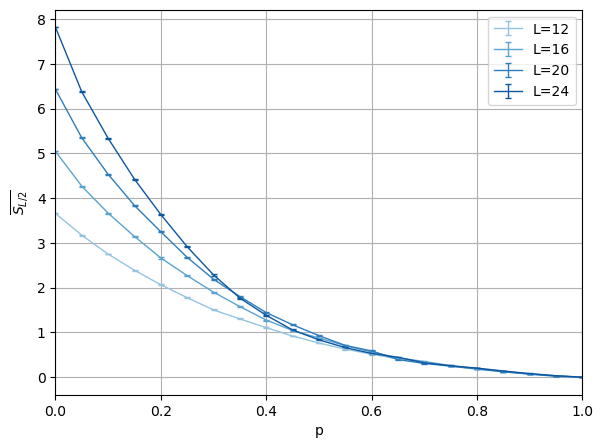

In [106]:
plot_SA_2(df_1_3_FB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_adder(1-3).png


(0.0, 1.0)

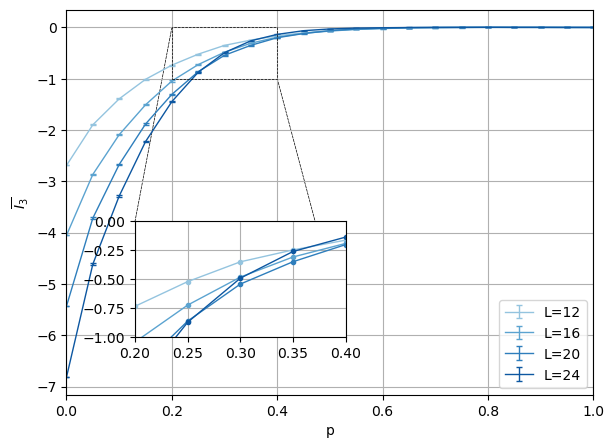

In [116]:
plot_SA_2(df_1_3_FB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.2,.4],ylim1=[-1,-0],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

In [118]:
optim=Optimizer(p_c=0.3,nu=1.3,df=df_1_3_FB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [119]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 249.05267797368396
              x: [ 3.105e-01  7.755e-01]
            nit: 37
           nfev: 70
  final_simplex: (array([[ 3.105e-01,  7.755e-01],
                        [ 3.105e-01,  7.756e-01],
                        [ 3.105e-01,  7.755e-01]]), array([ 2.491e+02,  2.491e+02,  2.491e+02])),
 49.81053559473679,
 tensor([0.0023, 0.0478], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1-3).png


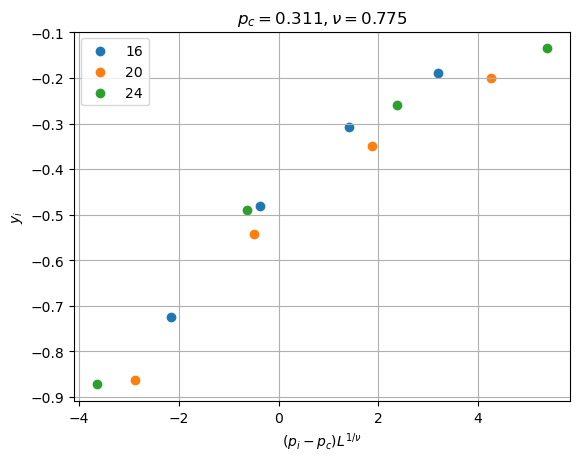

In [120]:
optim.plot_data_collapse()

EE_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

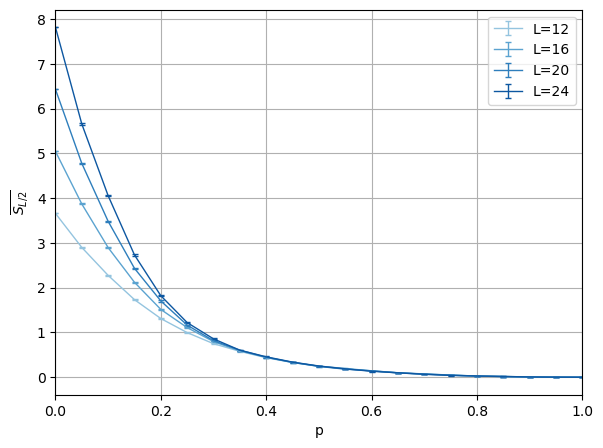

In [121]:
plot_SA_2(df_1_3_noFB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

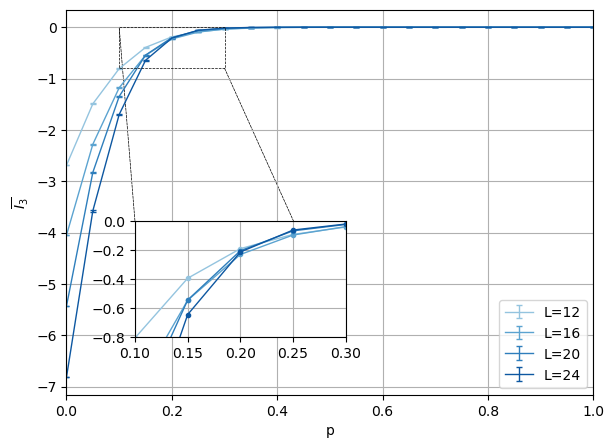

In [131]:
plot_SA_2(df_1_3_noFB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.1,.3],ylim1=[-.8,-0],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)


In [139]:
optim=Optimizer(p_c=0.2,nu=1.3,df=df_1_3_noFB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [140]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 53.517126809669094
              x: [ 1.650e-01  1.996e+00]
            nit: 38
           nfev: 73
  final_simplex: (array([[ 1.650e-01,  1.996e+00],
                        [ 1.650e-01,  1.996e+00],
                        [ 1.650e-01,  1.996e+00]]), array([ 5.352e+01,  5.352e+01,  5.352e+01])),
 10.703425361933819,
 tensor([0.0086, 0.2436], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(0-1).png


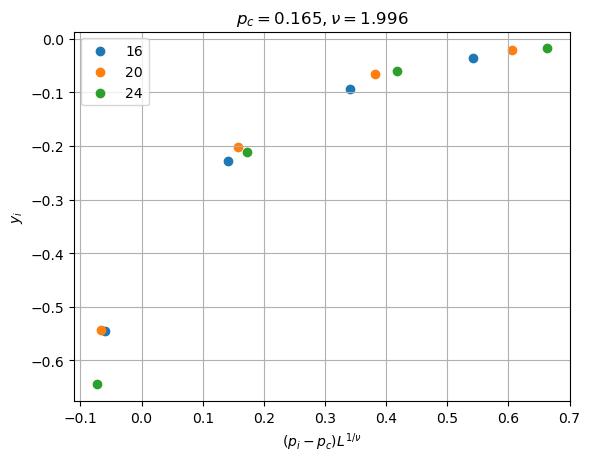

In [141]:
optim.plot_data_collapse()

### AFM FB

EE_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

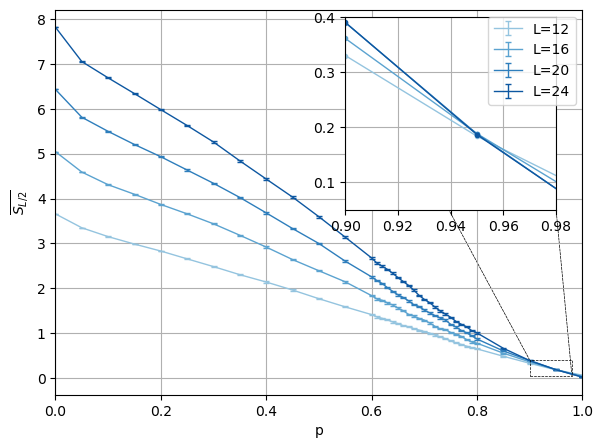

In [17]:
plot_SA_2(df2_AFM_FB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.9,0.98],ylim2=[0.05,4e-1],ax_inset_pos2=[.55,.48,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_adder(0-1).png


(-5.0, 0.4)

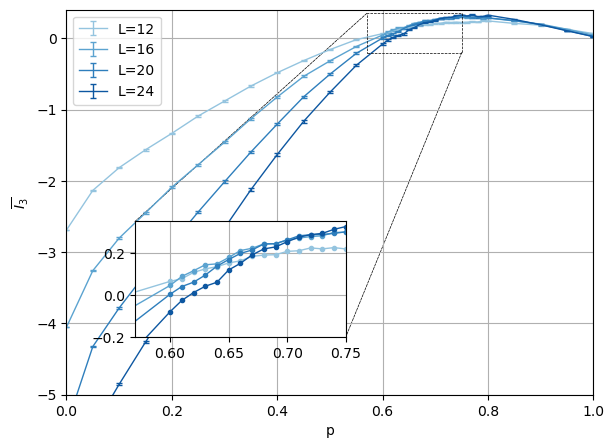

In [18]:
plot_SA_2(df2_AFM_FB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.57,.75],ylim1=[-.2,.35],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)
plt.gca().set_ylim(-5,.4)


In [35]:
optim=Optimizer(p_c=0.72,nu=1.0,df=df2_AFM_FB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [40]:
# optim.optimize_scipy()
optim.optimize_shift_scipy(omega=1,a=0.2,b=0,c=0,d=0)

/tmp/ipykernel_3987564/3225672872.py:169: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Hessian= torch.tensor(torch.autograd.functional.hessian(lambda x: self.loss_shift(*x),torch.tensor(res.x)))


(       message: Maximum number of function evaluations has been exceeded.
        success: False
         status: 1
            fun: 41.38501105986593
              x: [ 7.659e-01  1.018e+00 -4.808e-01  1.401e-01 -3.619e-03
                  -3.127e-02  3.908e-02]
            nit: 939
           nfev: 1400
  final_simplex: (array([[ 7.659e-01,  1.018e+00, ..., -3.127e-02,
                          3.908e-02],
                        [ 7.656e-01,  1.014e+00, ..., -3.074e-02,
                          3.847e-02],
                        ...,
                        [ 7.655e-01,  1.012e+00, ..., -3.037e-02,
                          3.806e-02],
                        [ 7.660e-01,  1.013e+00, ..., -3.026e-02,
                          3.790e-02]]), array([ 4.139e+01,  4.143e+01,  4.143e+01,  4.144e+01,
                         4.145e+01,  4.146e+01,  4.148e+01,  4.150e+01])),
 1.7610643004198268,
 tensor([   nan,    nan, 0.0366, 0.0137,    nan,    nan, 0.0070],
        dtype=torch.float6

TMI_Scaling_L(16,24)_adder(0-1).png


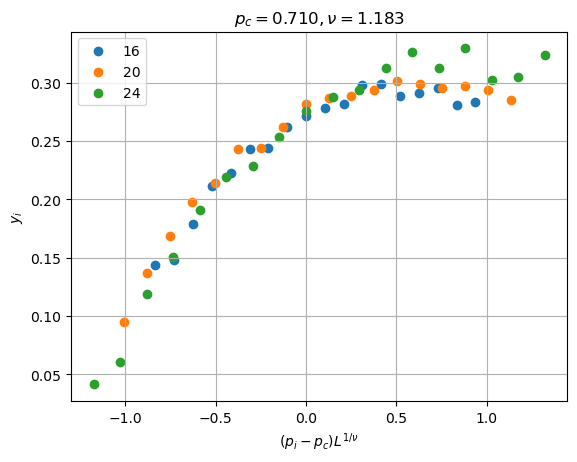

In [37]:
optim.plot_data_collapse()

### AFM noFB

EE_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

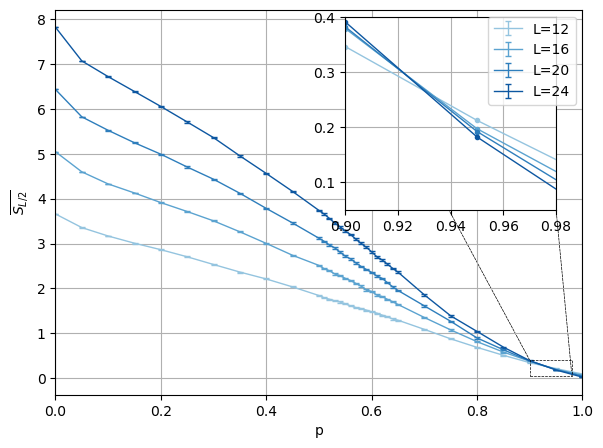

In [41]:
plot_SA_2(df2_AFM_noFB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=True,xlim2=[0.9,0.98],ylim2=[0.05,4e-1],ax_inset_pos2=[.55,.48,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

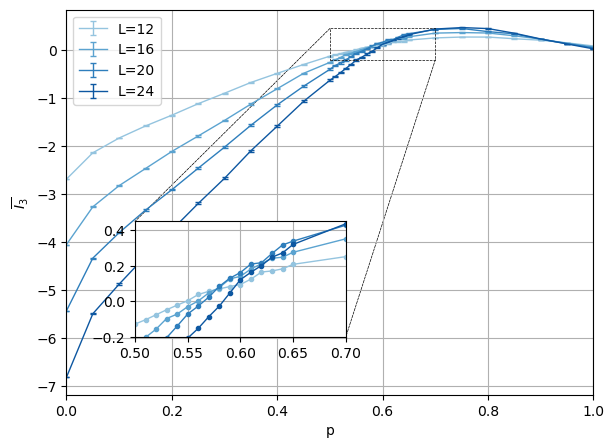

In [65]:
plot_SA_2(df2_AFM_noFB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.5,.7],ylim1=[-.2,.45],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

In [69]:
optim=Optimizer(p_c=0.6,nu=1.3,df=df2_AFM_noFB,params={'Metrics':'TMI',},Lmin=12,p_range=[-0.05,0.05])

In [70]:
# optim.optimize_scipy()
optim.optimize_shift_scipy(omega=1,a=0.1,b=0.1,c=0.1,d=0.1)

/tmp/ipykernel_3987564/3087168429.py:169: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Hessian= torch.tensor(torch.autograd.functional.hessian(lambda x: self.loss_shift(*x),torch.tensor(res.x)))


(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 105.90801266102393
              x: [ 5.947e-01  6.519e-01  5.307e+00  1.168e-01  4.545e-02
                  -2.125e-03 -1.325e-02]
            nit: 838
           nfev: 1313
  final_simplex: (array([[ 5.947e-01,  6.519e-01, ..., -2.125e-03,
                         -1.325e-02],
                        [ 5.947e-01,  6.519e-01, ..., -2.125e-03,
                         -1.324e-02],
                        ...,
                        [ 5.947e-01,  6.519e-01, ..., -2.125e-03,
                         -1.324e-02],
                        [ 5.947e-01,  6.519e-01, ..., -2.125e-03,
                         -1.324e-02]]), array([ 1.059e+02,  1.059e+02,  1.059e+02,  1.059e+02,
                         1.059e+02,  1.059e+02,  1.059e+02,  1.059e+02])),
 6.41866743400145,
 tensor([1.5858e-03, 3.6407e-02,        nan, 5.3142e-03, 1.1271e-02, 1.0018e-03,
         2.2694e+00], dtype=torch

TMI_Scaling_L(12,24)_adder(0-1).png


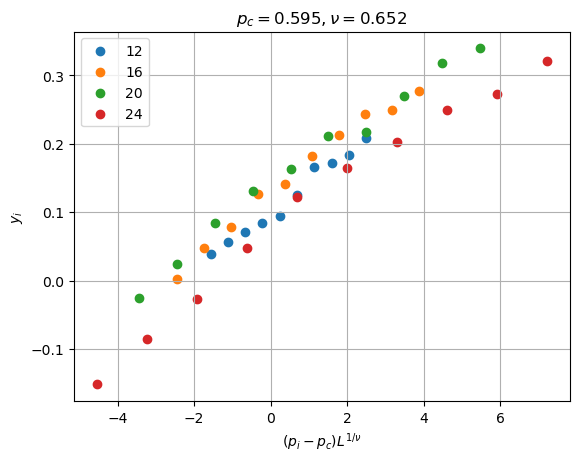

In [71]:
optim.plot_data_collapse()

## Bricklayer3 AFM

O_var_L(12,24)_adder(0-1).png


(0.0, 1.0)

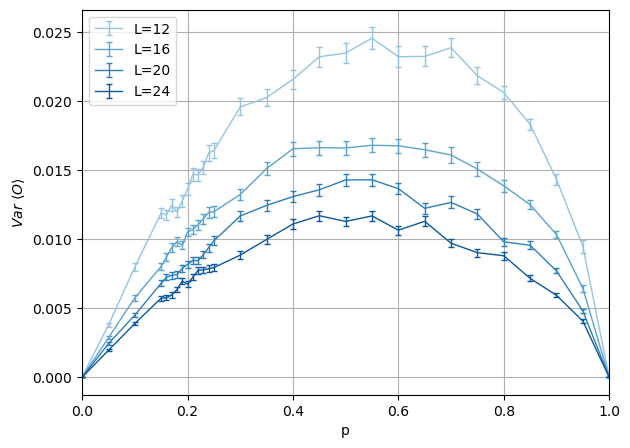

In [109]:
plot_SA_2(df_AFM_FB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='O',yscale=None,errorbar=True,filename='auto',method=np.var)
plt.gca().set_xlim(0,1)

EE_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

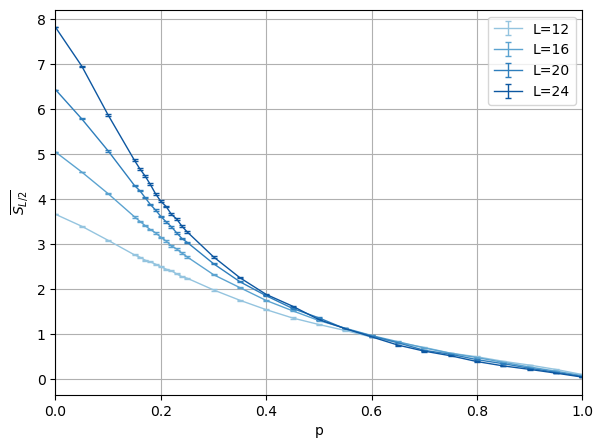

In [110]:
plot_SA_2(df_AFM_FB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

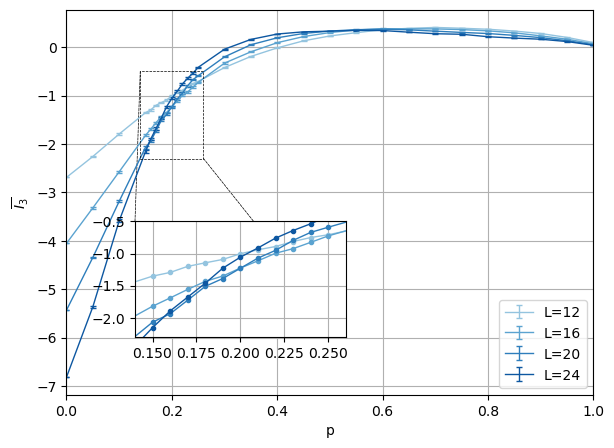

In [111]:
plot_SA_2(df_AFM_FB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.14,.26],ylim1=[-2.3,-.5],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

In [133]:
optim=Optimizer(p_c=0.18,nu=1.3,df=df_AFM_FB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.05,0.05])

In [131]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 91.04805892509592
              x: [ 1.781e-01  9.213e-01]
            nit: 53
           nfev: 100
  final_simplex: (array([[ 1.781e-01,  9.213e-01],
                        [ 1.781e-01,  9.213e-01],
                        [ 1.781e-01,  9.213e-01]]), array([ 9.105e+01,  9.105e+01,  9.105e+01])),
 7.283844714007674,
 tensor([0.0012, 0.0456], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(0-1).png


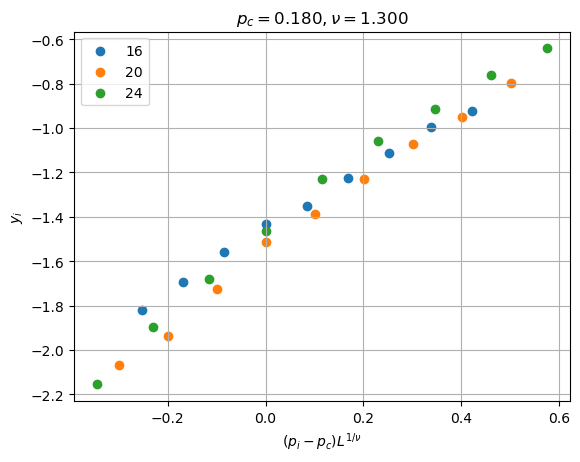

In [134]:
optim.plot_data_collapse()


#### no FB

O_var_L(12,24)_adder(0-1).png


(0.0, 1.0)

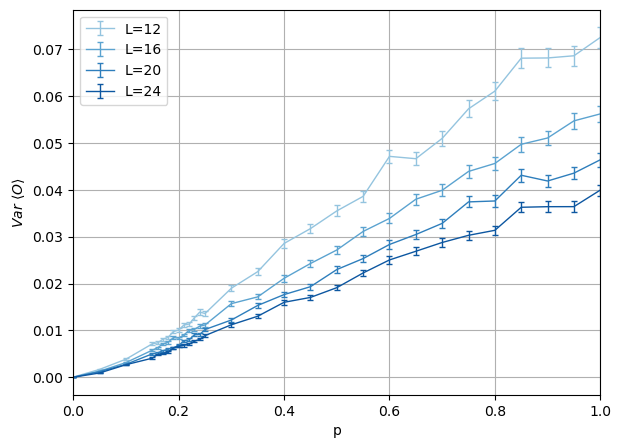

In [122]:
plot_SA_2(df_AFM_noFB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='O',yscale=None,errorbar=True,filename='auto',method=np.var)
plt.gca().set_xlim(0,1)

EE_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

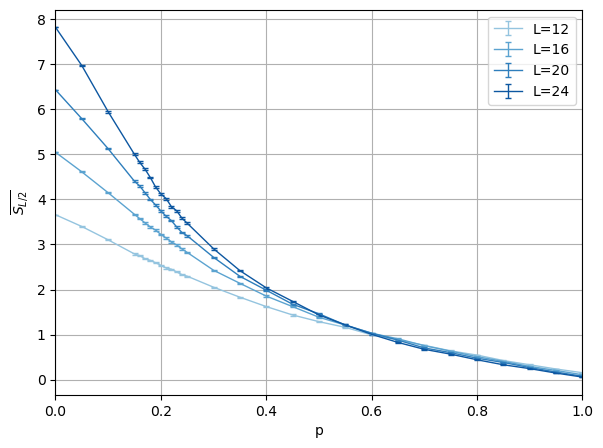

In [97]:
plot_SA_2(df_AFM_noFB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_adder(0-1).png


(0.0, 1.0)

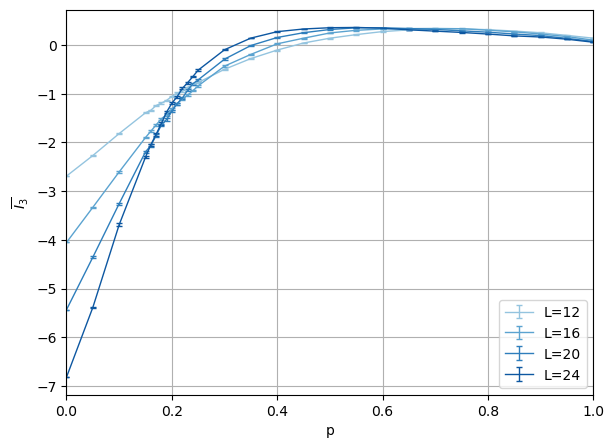

In [123]:
plot_SA_2(df_AFM_noFB,L_list=np.arange(12,25,4),inset1=False,xlim1=[.14,.26],ylim1=[.1,.6],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

In [124]:
optim=Optimizer(p_c=0.2,nu=1.0,df=df_AFM_noFB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [125]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 109.73101323258301
              x: [ 1.950e-01  7.254e-01]
            nit: 66
           nfev: 125
  final_simplex: (array([[ 1.950e-01,  7.254e-01],
                        [ 1.950e-01,  7.255e-01],
                        [ 1.950e-01,  7.254e-01]]), array([ 1.097e+02,  1.097e+02,  1.097e+02])),
 6.454765484269589,
 tensor([0.0006, 0.0134], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(0-1).png


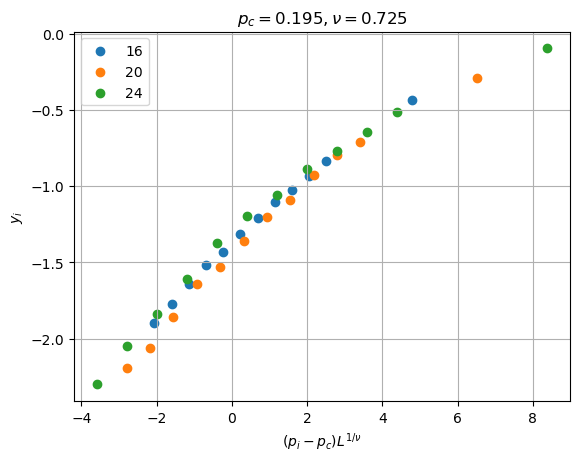

In [126]:
optim.plot_data_collapse()

### 1/3 FB

O_mean_L(12,24)_adder(1-3).png


(0.0, 1.0)

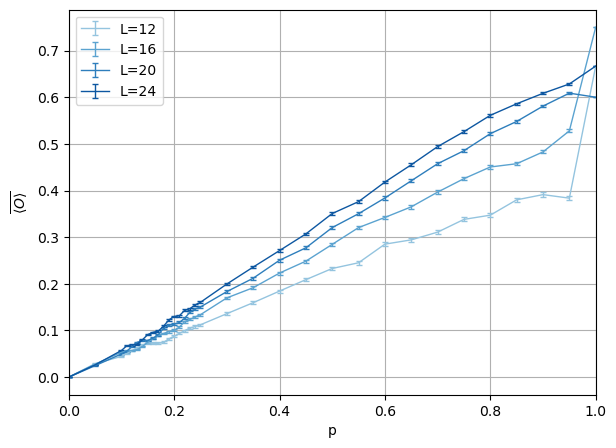

In [183]:
plot_SA_2(df3_1_3_FB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='O',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

EE_mean_L(12,24)_adder(1-3).png


(0.0, 1.0)

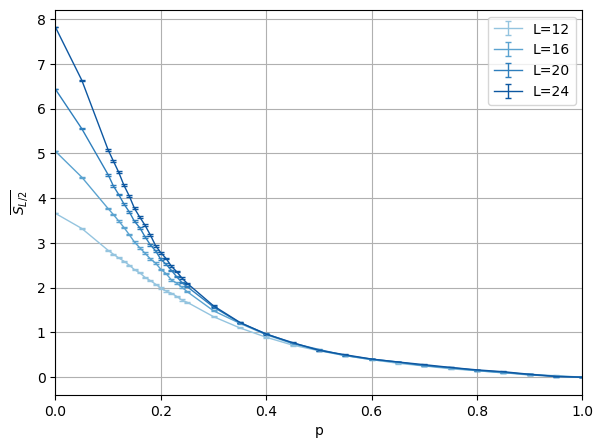

In [184]:
plot_SA_2(df3_1_3_FB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_adder(1-3).png


(0.0, 1.0)

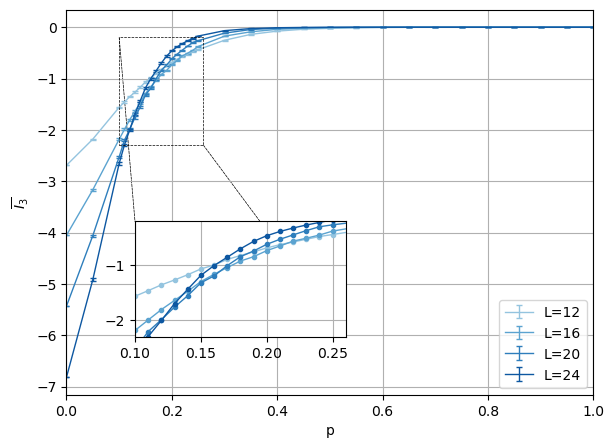

In [186]:
plot_SA_2(df3_1_3_FB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.10,.26],ylim1=[-2.3,-.2],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

In [187]:
optim=Optimizer(p_c=0.15,nu=1.,df=df3_1_3_FB,params={'Metrics':'TMI',},Lmin=16,p_range=[-.1,.1])

In [188]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 101.38868992878265
              x: [ 1.383e-01  9.437e-01]
            nit: 34
           nfev: 68
  final_simplex: (array([[ 1.383e-01,  9.437e-01],
                        [ 1.383e-01,  9.438e-01],
                        [ 1.383e-01,  9.438e-01]]), array([ 1.014e+02,  1.014e+02,  1.014e+02])),
 4.408203909947072,
 tensor([0.0008, 0.0181], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1-3).png


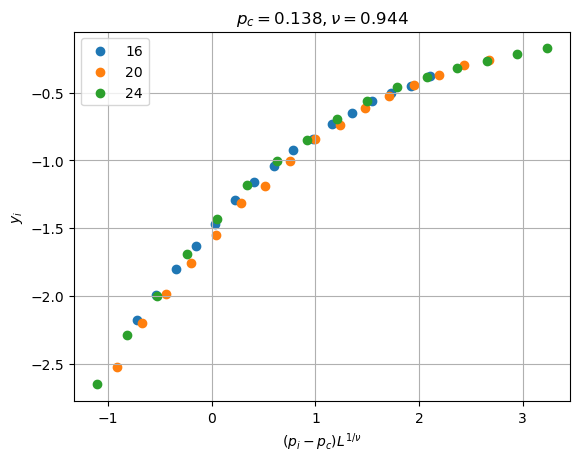

In [189]:
optim.plot_data_collapse()

### 1-3 noFB

O_mean_L(12,24)_adder(1-3).png


(0.0, 1.0)

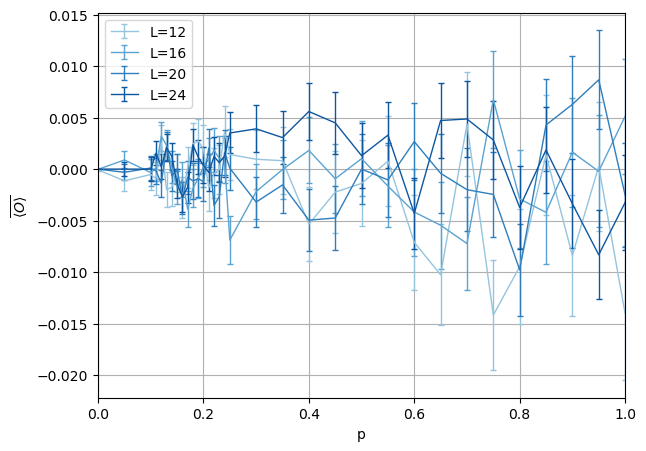

In [190]:
plot_SA_2(df3_1_3_noFB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='O',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

EE_mean_L(12,24)_adder(1-3).png


(0.0, 1.0)

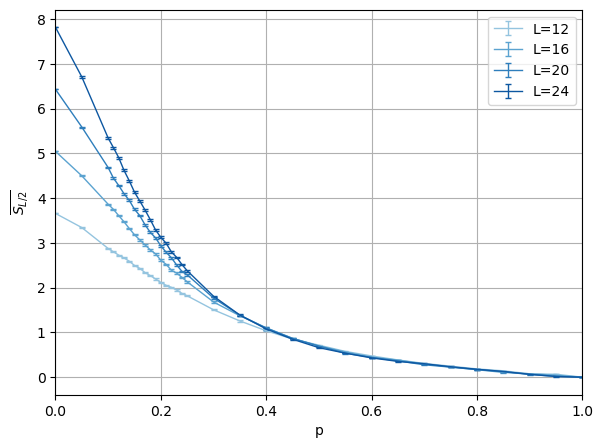

In [191]:
plot_SA_2(df3_1_3_noFB,L_list=np.arange(12,26,4),inset1=False,xlim1=[.28,.32],ylim1=[.15,.4],ax_inset_pos1=[.13,.45,.4,.3],inset2=False,xlim2=[0.47,0.52],ylim2=[2.2e-1,3e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='EE',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

TMI_mean_L(12,24)_adder(1-3).png


(0.0, 1.0)

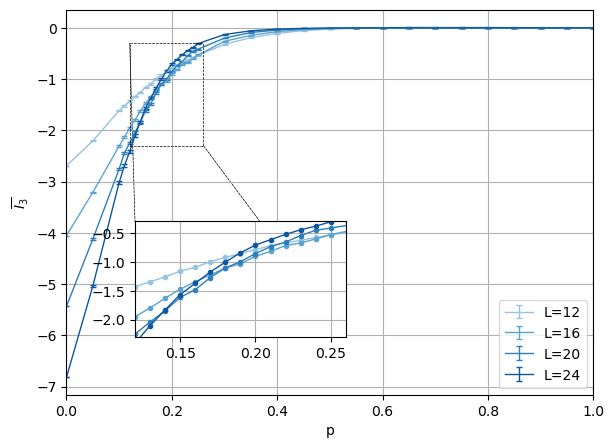

In [192]:
plot_SA_2(df3_1_3_noFB,L_list=np.arange(12,25,4),inset1=True,xlim1=[.12,.26],ylim1=[-2.3,-.3],ax_inset_pos1=[.13,.15,.4,.3],inset2=False,xlim2=[0.47,0.51],ylim2=[1e-1,4e-1],ax_inset_pos2=[.55,.3,.4,.5],metrics='TMI',yscale=None,errorbar=True,filename='auto')
plt.gca().set_xlim(0,1)

In [81]:
optim=Optimizer(p_c=0.15,nu=1.3,df=df3_1_3_noFB,params={'Metrics':'TMI',},Lmin=16,p_range=[-0.1,0.1])

In [82]:
optim.optimize_scipy()

(       message: Optimization terminated successfully.
        success: True
         status: 0
            fun: 122.38474054571424
              x: [ 1.655e-01  9.229e-01]
            nit: 33
           nfev: 66
  final_simplex: (array([[ 1.655e-01,  9.229e-01],
                        [ 1.655e-01,  9.228e-01],
                        [ 1.655e-01,  9.228e-01]]), array([ 1.224e+02,  1.224e+02,  1.224e+02])),
 5.321075675900619,
 tensor([0.0006, 0.0137], dtype=torch.float64))

TMI_Scaling_L(16,24)_adder(1-3).png


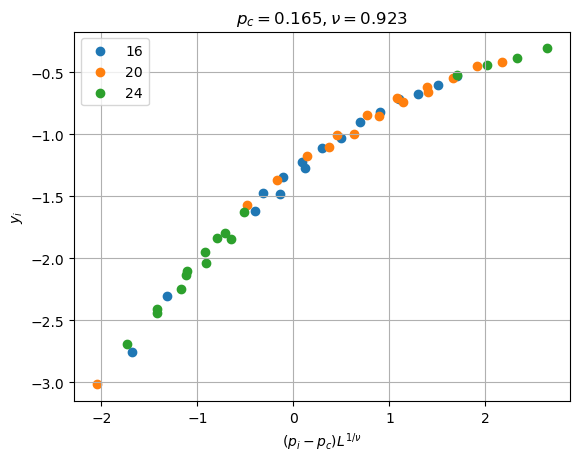

In [83]:
optim.plot_data_collapse()

# Obs-del

In [ ]:
def convert_pd(data_dict,):
    index = pd.MultiIndex.from_tuples([key for key in data_dict.keys() if key!='fn'], names=['Metrics','adder', 'L', 'p'])
    df = pd.DataFrame({'observations': [val for key,val in data_dict.items() if key!='fn']}, index=index)
    return df

In [ ]:
def generate_params(nu,de,L_list,seed_list,p_list,filename='params.txt',exist=False,filelist=None,load=False,data_dict=None,fn_dir='auto'):
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{s}.pickle'
    params_text=[]
    if fn_dir=='auto':
        fn_dir=f'bricklayer_{nu}-{de}'
        
    for L in L_list:
        for p in p_list:
            for seed in seed_list:
                    fn=fn_template.format(nu=nu,de=de,L=L,p=p,s=seed)
                        
                    if filelist is None:
                        file_exist = os.path.exists(os.path.join(fn_dir,fn))
                    else:
                        with open(filelist,'r') as f:
                            fn_list=f.read().split('\n')
                        file_exist = fn in fn_list
                        
                    if not file_exist:
                        params_text.append(f'{nu} {de} {L} {p:.2f} {seed}')
                    elif exist:
                        params_text.append(fn)
                        if load:
                            try:
                                data=load_pickle(os.path.join(fn_dir,fn))
                                add_to_dict(data_dict,data,fn)
                            except:
                                print(f'Error loading {fn}')
    
    if filename is not None:
        with open(filename,'a') as f:
            f.write('\n'.join(params_text)+'\n')

    return params_text

In [ ]:
def add_to_dict(data_dict,data,filename,bricklayer=True):
    if filename in data_dict['fn']:
        # print(f'File duplicated: {filename}' )
        pass
    else:
        data_dict['fn'].append(filename)
        if bricklayer:
            adder=(data['args'].nu,data['args'].de)
        else:
            xj=(data['args'].xj,None)
        for key in set(data.keys())-set(['args']):
            if bricklayer:
                params=(key,adder,data['args'].L,data['args'].p)
            else:
                params=(key,xj,data['args'].L,data['args'].p_ctrl,)
            if params in data_dict:
                data_dict[params].append(data[key])
            else:
                data_dict[params]=[data[key]]

In [ ]:
def generate_params_CT(xj,p_ctrl_list,p_proj_list,L_list,seed_list,noFB,filename='params_single.txt',exist=False,filelist=None,load=False,data_dict=None,fn_dir='auto',bricklayer=True,dir='.'):
    params_text=[]
    if fn_dir=='auto':
        fn_dir=f'CT_{xj}'.replace('/','-')
        print(fn_dir)
    for L in L_list:
        for p_ctrl in p_ctrl_list:
            for p_proj in p_proj_list:
                for seed in seed_list:
                    if abs(p_ctrl-round(p_ctrl,2))<1e-4:
                        p_ctrl_fmt='{p_ctrl:.2f}'
                    else:
                        p_ctrl_fmt='{p_ctrl:.3f}'
                    
                    if abs(p_proj-round(p_proj,2))<1e-4:
                        p_proj_fmt='{p_proj:.2f}'
                    else:
                        p_proj_fmt='{p_proj:.3f}'

                    fn_template='CT_pctrl'+p_ctrl_fmt+'_pproj'+p_proj_fmt+'_L{L}_xj({xj})_s{seed}{noFB}.pickle'

                    fn=fn_template.format(p_ctrl=p_ctrl,p_proj=p_proj,L=L,s=seed,xj=xj.replace('/','-'),seed=seed,noFB='_noFB' if noFB else '')
                        
                    if filelist is None:
                        file_exist = os.path.exists(os.path.join(fn_dir,fn))
                    else:
                        with open(os.path.join(dir,filelist),'r') as f:
                            fn_list=f.read().split('\n')
                        file_exist = fn in fn_list
                        
                    if not file_exist:
                        text_string_fmt=p_ctrl_fmt+ ' '+ p_proj_fmt +' {L} {xj} {seed} {noFB}'
                        text_string=(text_string_fmt.format(p_ctrl=p_ctrl,p_proj=p_proj,L=L,xj=xj,seed=seed,noFB="-noFB" if noFB else ""))
                        params_text.append(text_string)
                    elif exist:
                        params_text.append(fn)
                        if load:
                            data=load_pickle(os.path.join(fn_dir,fn),)
                            add_to_dict(data_dict,data,fn,bricklayer=bricklayer)
        
    if filename is not None:
        with open(filename,'a') as f:
            f.write('\n'.join(params_text)+'\n')

    return params_text

In [93]:
import os
import re
def rename_pickles(directory,dry=True):
    if not os.path.exists(directory):
        print(f'dir {directory} not exist')
        return

    # return os.listdir(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".pickle"):
            # new_filename = re.sub(r"(_pctrl\d\.\d\d)_", r"\g<1>0_", filename)
            # new_filename = re.sub(r"(_pproj\d\.\d\d)_", r"\g<1>0_", new_filename)
            new_filename = re.sub(r"bricklayer_", r"bricklayer2_", filename)
            if new_filename != filename:
                if not dry:
                    os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
                print(f"Renamed: {filename} -> {new_filename}")

In [ ]:
rename_pickles('CT_1-3,2-3',dry=True)

In [ ]:
rename_pickles('bricklayer2_AFM_noFB',dry=False)
rename_pickles('bricklayer2_AFM_FB',dry=False)

In [ ]:
def generate_params_2(nu,de,L_list,seed_list,p_list,feedback,filename='params.txt',exist=False,filelist=None,load=False,data_dict=None,fn_dir='auto',AFM=False):
    fn_template='bricklayer_adder_({nu}-{de})_L{L}_p{p:.2f}_s{s}{FB}.pickle'

    params_text=[]
    if fn_dir=='auto':
        fn_dir=f'bricklayer2{"_AFM" if AFM else f"_{nu}-{de}"}{"_FB" if feedback else "_noFB"}'
        # fn_dir=f'bricklayer2_{nu}-{de}{"_FB" if feedback else "_noFB"}'
        
    for L in tqdm(L_list):
        for p in p_list:
            for seed in seed_list:
                    fn=fn_template.format(nu=nu,de=de,L=L,p=p,s=seed,FB="_FB" if feedback else "_noFB")
                        
                    if filelist is None:
                        file_exist = os.path.exists(os.path.join(fn_dir,fn))
                    else:
                        with open(filelist,'r') as f:
                            fn_list=f.read().split('\n')
                        file_exist = fn in fn_list
                        
                    if not file_exist:
                        params_text.append(f'{nu} {de} {L} {p:.2f} {seed} {"-feedback" if feedback else ""}')
                    elif exist:
                        params_text.append(fn)
                        if load:
                            try:
                                data=load_pickle(os.path.join(fn_dir,fn))
                                add_to_dict(data_dict,data,fn)
                            except:
                                print(f'Error loading {fn}')
    
    if filename is not None:
        with open(filename,'a') as f:
            f.write('\n'.join(params_text)+'\n')

    return params_text

In [ ]:
def generate_params_3(nu,de,L_list,seed_list,p_list,feedback,filename='params.txt',exist=False,filelist=None,load=False,data_dict=None,fn_dir='auto',AFM=True):
    fn_template='bricklayer3_adder_({nu}-{de})_L{L}_p{p:.2f}_s{s}{FB}.pickle'

    params_text=[]
    if fn_dir=='auto':
        fn_dir=f'bricklayer3{"_AFM" if AFM else f"_{nu}-{de}"}{"_FB" if feedback else "_noFB"}'
    print(fn_dir)
    for L in L_list:
        for p in p_list:
            for seed in seed_list:
                    fn=fn_template.format(nu=nu,de=de,L=L,p=p,s=seed,FB="_FB" if feedback else "_noFB")
                        
                    if filelist is None:
                        file_exist = os.path.exists(os.path.join(fn_dir,fn))
                    else:
                        with open(filelist,'r') as f:
                            fn_list=f.read().split('\n')
                        file_exist = fn in fn_list
                        
                    if not file_exist:
                        params_text.append(f'{nu} {de} {L} {p:.2f} {seed} {"-feedback" if feedback else ""}')
                    elif exist:
                        params_text.append(fn)
                        if load:
                            try:
                                data=load_pickle(os.path.join(fn_dir,fn))
                                add_to_dict(data_dict,data,fn)
                            except:
                                print(f'Error loading {fn}')
    
    if filename is not None:
        with open(filename,'a') as f:
            f.write('\n'.join(params_text)+'\n')

    return params_text